# **Тема курсовой работы**:
## «Разработка модели линейной регрессии и анализ параметров модели с применением методики Elastic-Net на примере данных продолжительности поездки в такси в Нью-Йорке»

выполнил студент группы ИНБО-05-22 Кузнецов Дмитрий Сергеевич

## Установка необходимых библиотек и загрузка датасета

In [ ]:
# Установка пакетов в R
install.packages("reticulate")
install.packages("readr")
install.packages("dplyr")
install.packages("ggplot2")
install.packages("corrplot")
install.packages("grid")

# Загрузка библиотек
library(reticulate)
library(readr)
library(dplyr)
library(ggplot2)
library(corrplot)
library(grid)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘RcppTOML’, ‘here’, ‘png’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘grid’ is a base package, and should not be updated”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


corrplot 0.92 loaded



In [ ]:
install.packages("googledrive")
library(googledrive)

# Аутентификация в Google Drive
drive_auth()
# Загрузка файла kaggle.json из Google Drive в рабочую директорию
drive_download(as_id("1LcPayVyZu8bHpnuPXbrbnEVOMOJj6RHU"), path = "kaggle.json")

# Создание папки для хранения Kaggle API ключа
system("mkdir -p ~/.kaggle")

# Перемещение kaggle.json в нужное место и установка прав доступа
system("mv kaggle.json ~/.kaggle/")
system("chmod 600 ~/.kaggle/kaggle.json")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Is it OK to cache OAuth access credentials in the folder ~/.cache/gargle
between R sessions?
1: Yes
2: No


Selection: 1


Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=890eab98e281598567cf64e4286e03b7&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQVR4M0xZNllNVHYtV0EyaElnWS0xNU9nTGVBQk9NcC04c3dCSVJldzhiX0FpcVFsYktvM1VoU0hqcV9IRHpwWlU4Q1NmUSIsInN0YXRlIjoiODkwZWFiOThlMjgxNTk4NTY3Y2Y2NGU0Mjg2ZTAzYjcifQ==


File downloaded:

• kaggle.json <id: 1LcPayVyZu8bHpnuPXbrbnEVOMOJj6RHU>

Saved locally as:

• kaggle.json



In [ ]:
# Установка Kaggle CLI через систему команд
system("pip install kaggle")

# Загрузка датасета с Kaggle
system("kaggle competitions download -c nyc-taxi-trip-duration -p /content")

# Распаковка загруженного архива
system("unzip /content/nyc-taxi-trip-duration.zip -d /content/nyc-taxi-trip-duration")
system("unzip /content/nyc-taxi-trip-duration/train.zip -d /content/nyc-taxi-trip-duration/train")
system("unzip /content/nyc-taxi-trip-duration/test.zip -d /content/nyc-taxi-trip-duration/test")
system("unzip /content/nyc-taxi-trip-duration/sample_submission.zip -d /content/nyc-taxi-trip-duration/sample_submission")

## Анализ данных

In [ ]:
# Чтение CSV файла в R
train <- read_csv("/content/nyc-taxi-trip-duration/train/train.csv")

# Просмотр первых строк данных
head(train)

Rows: 1458644 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): id, store_and_fwd_flag
dbl  (7): vendor_id, passenger_count, pickup_longitude, pickup_latitude, dro...
dttm (2): pickup_datetime, dropoff_datetime

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
<chr>,<dbl>,<dttm>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.98215,40.76794,-73.96463,40.76560,N,455
id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.98042,40.73856,-73.99948,40.73115,N,663
id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.97903,40.76394,-74.00533,40.71009,N,2124
id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.01004,40.71997,-74.01227,40.70672,N,429
id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.97305,40.79321,-73.97292,40.78252,N,435
id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.98286,40.74220,-73.99208,40.74918,N,443


Поля данных:
1. id - уникальный идентификатор для каждой поездки
2. vendor_id - код, указывающий на поставщика, связанного с записью поездки
3. pickup_datetime - дата и время включения счетчика
4. drop_datetime - дата и время отключения счетчика
5. passenger_count - количество пассажиров в транспортном средстве (введенное водителем значение)
6. pickup_longitude - долгота, на которой был включен счетчик
7. pickup_latitude - широта, на которой был включен счетчик
8. drop_longitude - долгота, на которой был отключен счетчик
9. drop_latitude - широта, на которой был отключен счетчик.
10. store_and_fwd_flag - этот флаг показывает, сохранялась ли запись о поездке в памяти транспортного средства перед отправкой поставщику, поскольку транспортное средство не имело подключения к серверу - Y=сохранить и переслать; N=не сохранить и не переслать поездку
11. trip_duration - продолжительность поездки в секундах

In [ ]:
summary(train)

      id              vendor_id     pickup_datetime                 
 Length:1458644     Min.   :1.000   Min.   :2016-01-01 00:00:17.00  
 Class :character   1st Qu.:1.000   1st Qu.:2016-02-17 16:46:04.25  
 Mode  :character   Median :2.000   Median :2016-04-01 17:19:40.00  
                    Mean   :1.535   Mean   :2016-04-01 10:10:24.94  
                    3rd Qu.:2.000   3rd Qu.:2016-05-15 03:56:08.75  
                    Max.   :2.000   Max.   :2016-06-30 23:59:39.00  
 dropoff_datetime                 passenger_count pickup_longitude 
 Min.   :2016-01-01 00:03:31.00   Min.   :0.000   Min.   :-121.93  
 1st Qu.:2016-02-17 17:05:32.50   1st Qu.:1.000   1st Qu.: -73.99  
 Median :2016-04-01 17:35:12.00   Median :1.000   Median : -73.98  
 Mean   :2016-04-01 10:26:24.43   Mean   :1.665   Mean   : -73.97  
 3rd Qu.:2016-05-15 04:10:51.75   3rd Qu.:2.000   3rd Qu.: -73.97  
 Max.   :2016-07-01 23:02:03.00   Max.   :9.000   Max.   : -61.34  
 pickup_latitude dropoff_longitude dropof

Видим максимальную длительность поездки - 3526282 секунды (979 часов). Похоже на аномалию.

Также видим, что минимальное количество пассажиров - 0, а максимальное - 9.

In [ ]:
# Подсчет уникальных значений в каждом столбце
unique_counts <- sapply(train, n_distinct)

# Вывод результатов
print(unique_counts)

                id          vendor_id    pickup_datetime   dropoff_datetime 
           1458644                  2            1380222            1380377 
   passenger_count   pickup_longitude    pickup_latitude  dropoff_longitude 
                10              23047              45245              33821 
  dropoff_latitude store_and_fwd_flag      trip_duration 
             62519                  2               7417 


Видим, что `vendor_id` принимает только значения 1 и 2 - это две компании-перевозчики.

In [ ]:
sum(is.na(train))

[1] 0

Пропусков в данных нет - это хорошо. Посмотрим на структуру данных.

In [ ]:
str(train)

spc_tbl_ [1,458,644 × 11] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ id                : chr [1:1458644] "id2875421" "id2377394" "id3858529" "id3504673" ...
 $ vendor_id         : num [1:1458644] 2 1 2 2 2 2 1 2 1 2 ...
 $ pickup_datetime   : POSIXct[1:1458644], format: "2016-03-14 17:24:55" "2016-06-12 00:43:35" ...
 $ dropoff_datetime  : POSIXct[1:1458644], format: "2016-03-14 17:32:30" "2016-06-12 00:54:38" ...
 $ passenger_count   : num [1:1458644] 1 1 1 1 1 6 4 1 1 1 ...
 $ pickup_longitude  : num [1:1458644] -74 -74 -74 -74 -74 ...
 $ pickup_latitude   : num [1:1458644] 40.8 40.7 40.8 40.7 40.8 ...
 $ dropoff_longitude : num [1:1458644] -74 -74 -74 -74 -74 ...
 $ dropoff_latitude  : num [1:1458644] 40.8 40.7 40.7 40.7 40.8 ...
 $ store_and_fwd_flag: chr [1:1458644] "N" "N" "N" "N" ...
 $ trip_duration     : num [1:1458644] 455 663 2124 429 435 ...
 - attr(*, "spec")=
  .. cols(
  ..   id = col_character(),
  ..   vendor_id = col_double(),
  ..   pickup_datetime = col_datetime(for

Посмотрим на распределение длительности поездок при помощи коробчатой диаграммы:

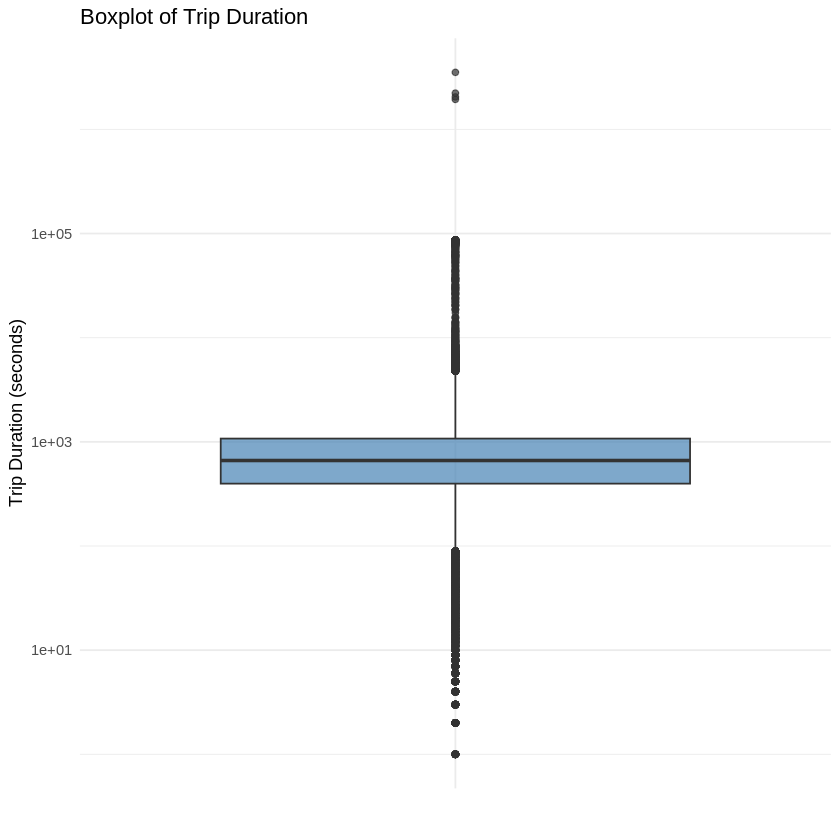

In [ ]:
ggplot(train, aes(x = "", y = trip_duration)) +
  geom_boxplot(fill = "steelblue", alpha = 0.7) +
  labs(title = "Boxplot of Trip Duration", x = "", y = "Trip Duration (seconds)") +
  theme_minimal()+
  scale_y_log10()


Существуют значительные выбросы, которые видны даже на прологарифмированной оси. Учтем это в будущем при очистке данных.

Построим гистограмму количества поездок определенной длительности с прологарифмированной осью ординат:

Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 39630 rows containing missing values or values outside the scale range
(`geom_bar()`).”


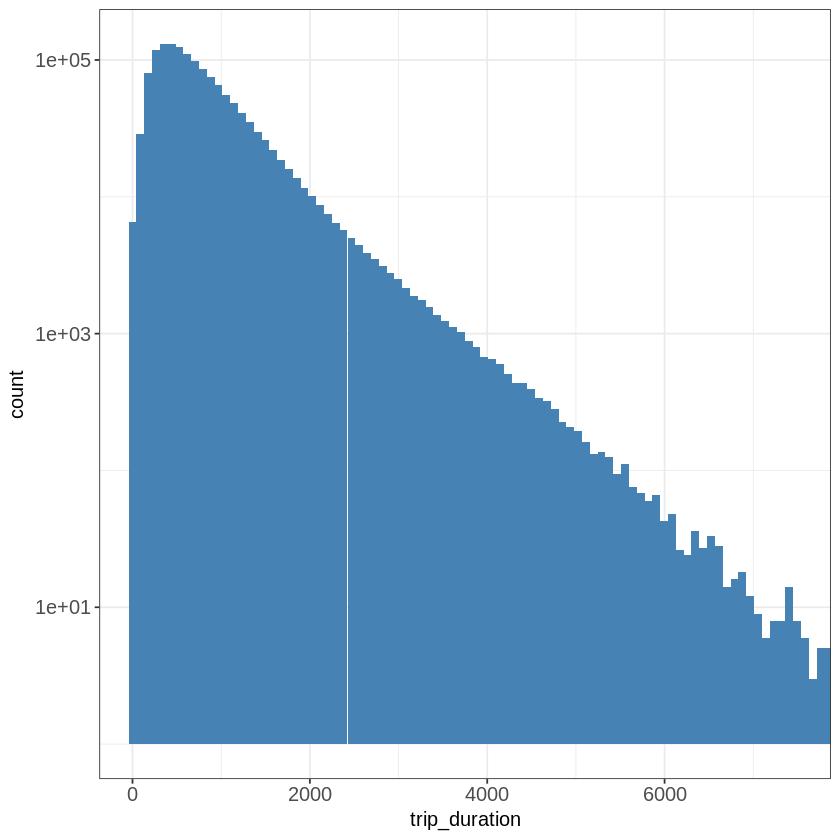

In [ ]:
train %>%
  ggplot(aes(x=trip_duration)) +
  geom_histogram(bins=40000, fill="steelblue") +
  theme_bw() +
  theme(axis.title = element_text(size=12),axis.text = element_text(size=12)) +
  ylab("count") +
  coord_cartesian(x=c(0,7500)) +
  scale_y_log10()

Большинство поездок длились около 600 секунд.

Посмотрим на распределение количества пассажиров.

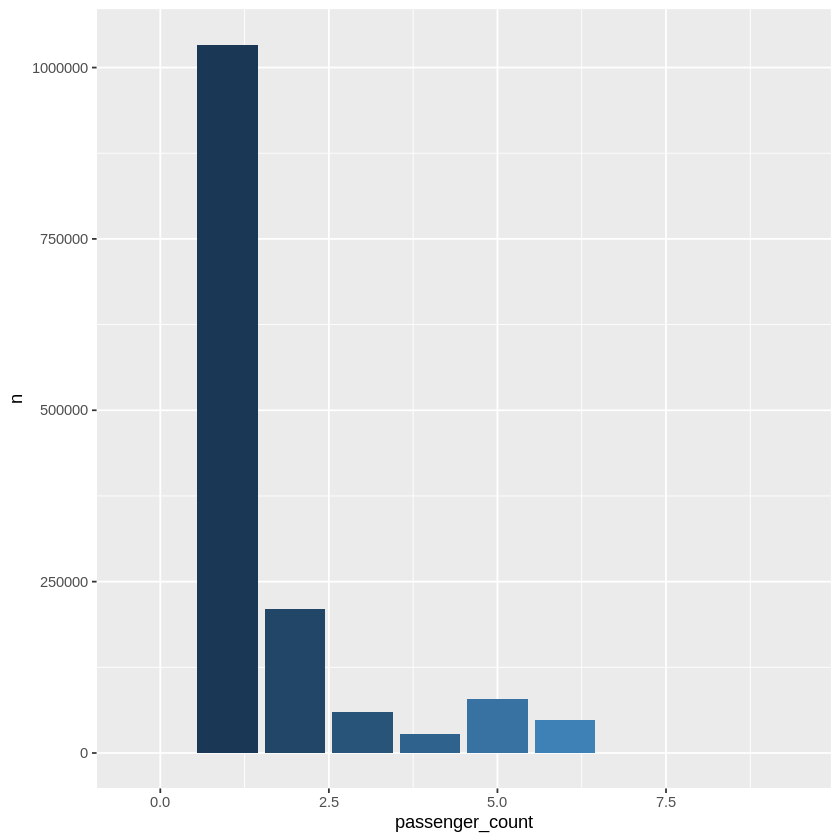

In [ ]:
train %>%
  group_by(passenger_count) %>%
  count() %>%
  ggplot(aes(x=passenger_count,y=n, fill=passenger_count))+
  geom_col() +
  theme(legend.position = "none")

Чаще всего количество пассажиров было равно 1.

Преобразуем датасет: добавим столбцы `pickup_hour`, `pickup_day` и `pickup_month`.

In [ ]:
install.packages("lubridate")
library(lubridate)

train <- train %>%
  mutate(pickup_hour = hour(pickup_datetime),
         pickup_day = wday(pickup_datetime, label = TRUE, abbr = FALSE),
         pickup_month = month(pickup_datetime, label = TRUE, abbr = FALSE),)

head(train)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_hour,pickup_day,pickup_month
<chr>,<dbl>,<dttm>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<ord>,<ord>
id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.98215,40.76794,-73.96463,40.76560,N,455,17,Monday,March
id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.98042,40.73856,-73.99948,40.73115,N,663,0,Sunday,June
id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.97903,40.76394,-74.00533,40.71009,N,2124,11,Tuesday,January
id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.01004,40.71997,-74.01227,40.70672,N,429,19,Wednesday,April
id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.97305,40.79321,-73.97292,40.78252,N,435,13,Saturday,March
id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.98286,40.74220,-73.99208,40.74918,N,443,22,Saturday,January


In [ ]:
train <- train %>%
  mutate(pickup_day = factor(pickup_day,
                                     levels = c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday")))


В среднем у второго перевозчика более продолжительные поездки. Однако нужен более детальный анализ, так как на это могли повлиять аномалии или некачественные данные. Выведем топ-10 самых долгих поездок для каждого перевозчика:

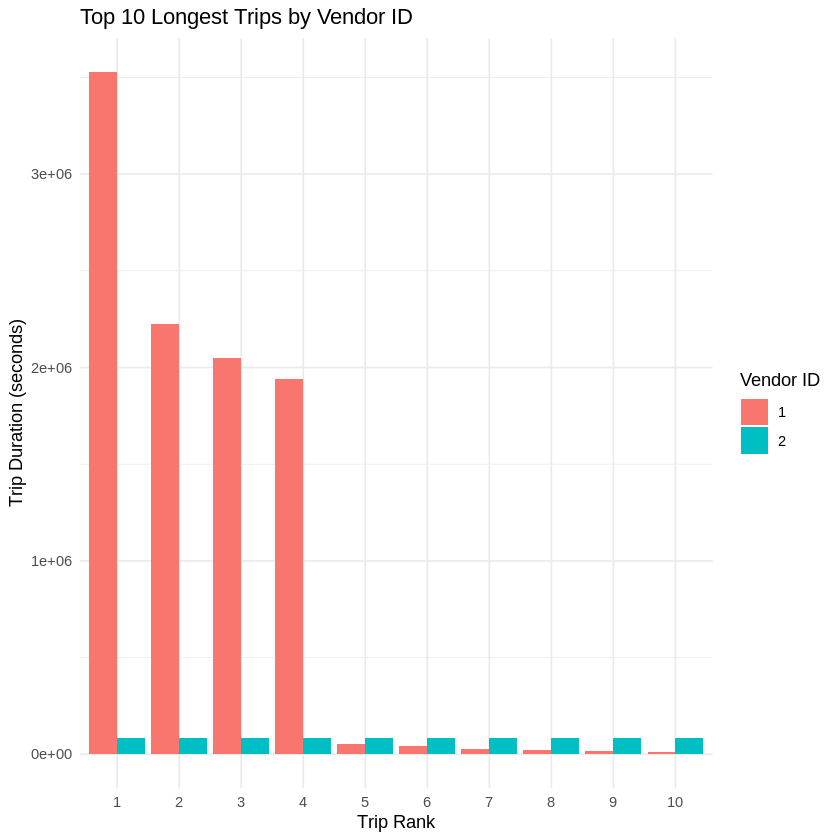

In [ ]:
# Функция для отбора топ N самых продолжительных поездок для каждого vendor_id
top_n_trips <- function(data, n) {
  data %>%
    group_by(vendor_id) %>%
    top_n(n, trip_duration) %>%
    arrange(vendor_id, desc(trip_duration)) %>%
    mutate(rank = row_number())
}

# Отбор 10 самых продолжительных поездок для каждого vendor_id
top_10_trips <- top_n_trips(train, 10)

# Построение графика
ggplot(top_10_trips, aes(x = factor(rank), y = trip_duration, fill = factor(vendor_id))) +
  geom_col(position = position_dodge()) +
  labs(title = "Top 10 Longest Trips by Vendor ID",
       x = "Trip Rank",
       y = "Trip Duration (seconds)",
       fill = "Vendor ID") +
  theme_minimal()

Наблюдение: у первого перевозчика 4 самые долгие поездки (которые похожи на аномалии), но после них преимущество забирает второй перевозчик.

Посмотрим, как влияют часы, дни недели и месяцы на среднюю продолжительность поездки.

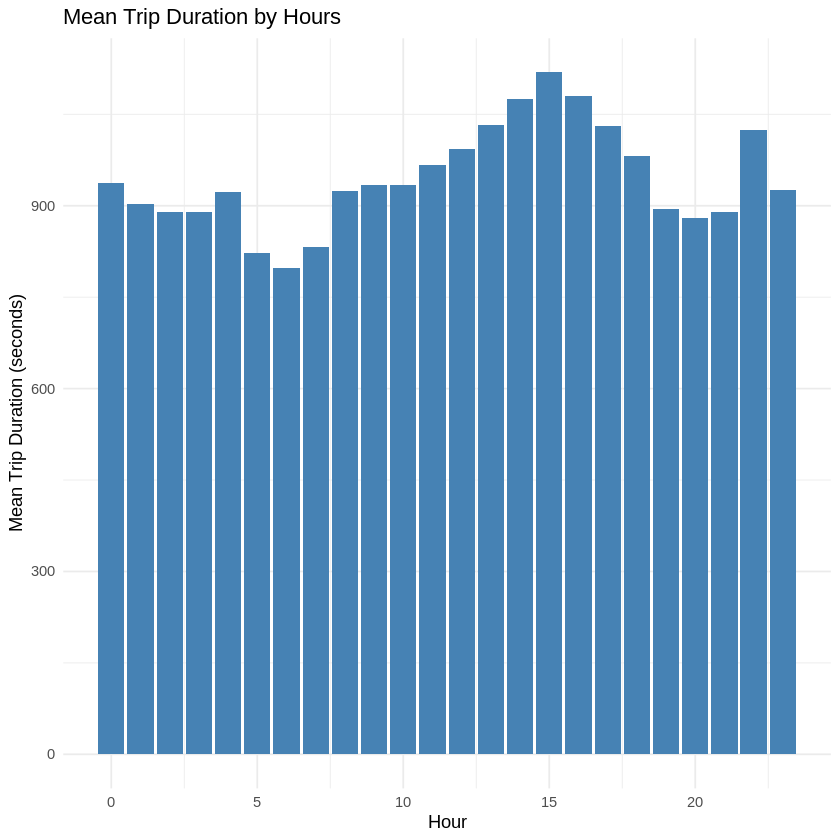

In [ ]:
# Агрегация данных: средняя продолжительность поездки в зависимости от дня недели
avg_trip_duration_by_hour <- train %>%
  group_by(pickup_hour) %>%
  summarise(avg_trip_duration = mean(trip_duration)) %>%
  arrange(pickup_hour)

# Построение столбчатой диаграммы
ggplot(avg_trip_duration_by_hour, aes(x = pickup_hour, y = avg_trip_duration)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  labs(title = "Mean Trip Duration by Hours",
       x = "Hour",
       y = "Mean Trip Duration (seconds)") +
  theme_minimal()

В течение обычного дня пик приходится на вторую половину дня, а спадает в районе 5-6 утра и 8 вечера, после чего снова возрастает после 10 вечера и остается на одинаковом уровне до 4 утра.

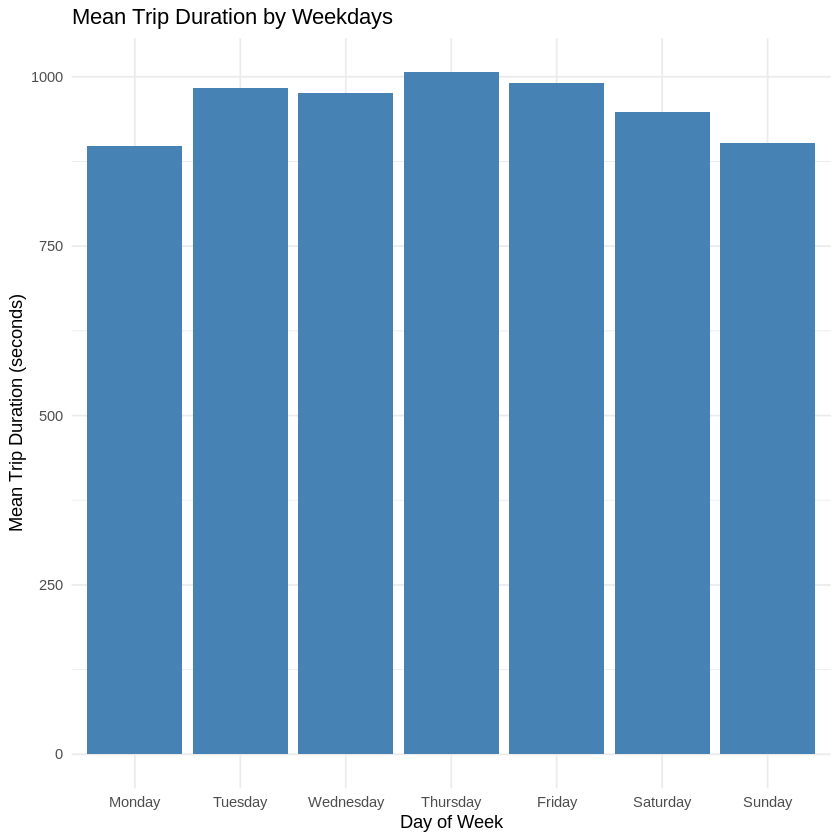

In [ ]:
# Агрегация данных: средняя продолжительность поездки в зависимости от дня недели
avg_trip_duration_by_day <- train %>%
  group_by(pickup_day_of_week) %>%
  summarise(avg_trip_duration = mean(trip_duration)) %>%
  arrange(pickup_day_of_week)

# Построение столбчатой диаграммы
ggplot(avg_trip_duration_by_day, aes(x = pickup_day_of_week, y = avg_trip_duration)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  labs(title = "Mean Trip Duration by Weekdays",
       x = "Day of Week",
       y = "Mean Trip Duration (seconds)") +
  theme_minimal()

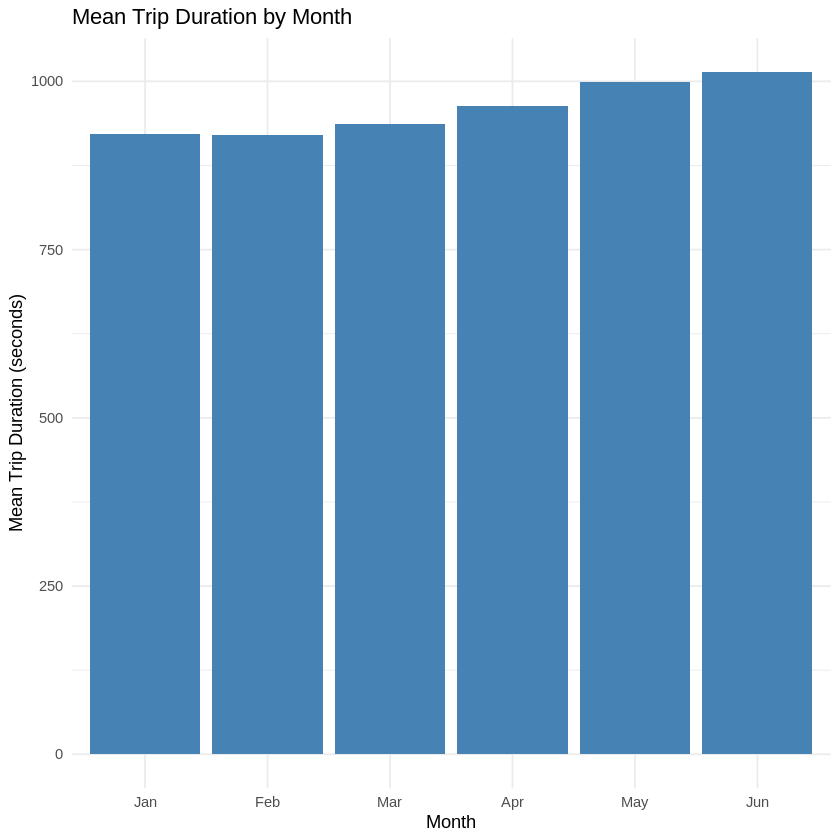

In [ ]:
# Агрегация данных: средняя продолжительность поездки в зависимости от месяца
avg_trip_duration_by_month <- train %>%
  mutate(pickup_month = month(pickup_datetime, label = TRUE)) %>%
  group_by(pickup_month) %>%
  summarise(avg_trip_duration = mean(trip_duration)) %>%
  arrange(pickup_month)

# Построение столбчатой диаграммы
ggplot(avg_trip_duration_by_month, aes(x = pickup_month, y = avg_trip_duration)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  labs(title = "Mean Trip Duration by Month",
       x = "Month",
       y = "Mean Trip Duration (seconds)") +
  theme_minimal()


Видим небольшую положительную динамику - ближе к лету средняя продолжительность поездки немного увеличивается.

День недели и время поездки, возможно, являются важными параметрами для прогнозирования ее продолжительности и должны быть включены в успешную модель. Посмотрим зависимость средней продолжительности поездки и числа пассажиров.

Посмотрим зависимость средней продолжительности поездки и числа пассажиров.

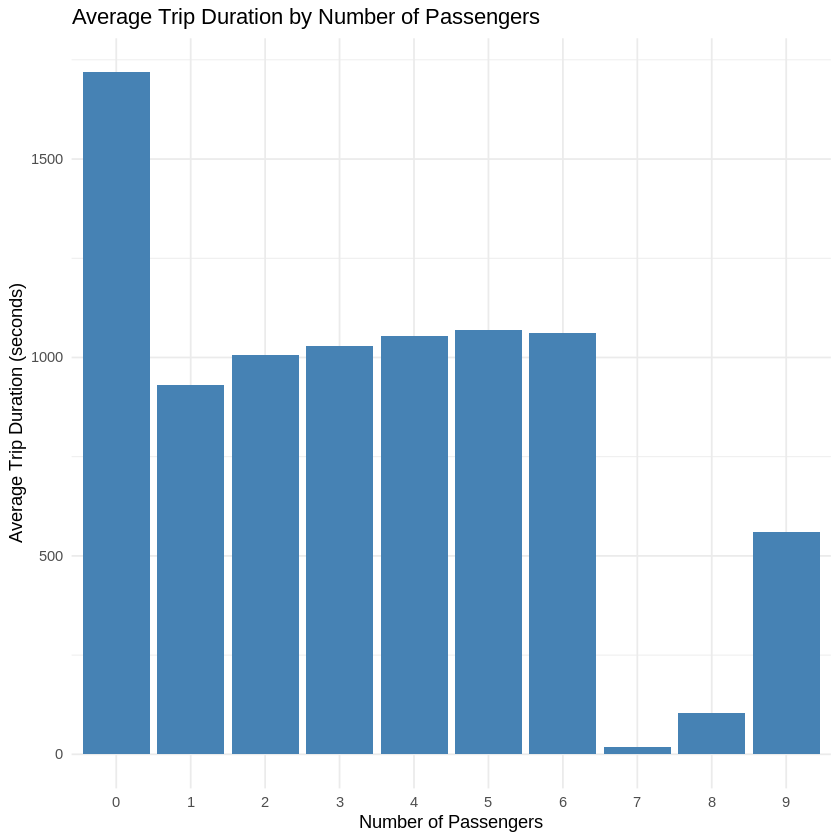

In [ ]:
avg_trip_duration_by_passenger_count <- train %>%
  group_by(passenger_count) %>%
  summarise(avg_trip_duration = mean(trip_duration)) %>%
  arrange(passenger_count)

ggplot(avg_trip_duration_by_passenger_count, aes(x = factor(passenger_count), y = avg_trip_duration)) +
  geom_col(fill="steelblue") +
  labs(title = "Average Trip Duration by Number of Passengers",
       x = "Number of Passengers",
       y = "Average Trip Duration (seconds)") +
  theme_minimal()+
  theme(legend.position = "none")

Средняя продолжительность поездки при 0 пассажирах почти вдвое превышает продолжительность поездок при любом другом количестве. Чтобы узнать, насколько график информативный, посмотрим на общее количество поездок, совершенных `n` пассажирами.

In [ ]:
# Подсчет количества поездок для каждой категории пассажиров
passenger_trip_counts <- train %>%
  group_by(passenger_count) %>%
  summarise(trip_count = n())

# Вывод результата
print(passenger_trip_counts)

# A tibble: 10 × 2
   passenger_count trip_count
             <dbl>      <int>
 1               0         60
 2               1    1033540
 3               2     210318
 4               3      59896
 5               4      28404
 6               5      78088
 7               6      48333
 8               7          3
 9               8          1
10               9          1


Таким образом, было совершено 60 поездок без пассажира, 3 поездки с 7 пассажирами, и по 1 с 8 и 9 пассажирами. В контексте общей таблицы это совсем не существенные значения. Отбросив эти поездки, получим более равномерно распределенную гистограмму.

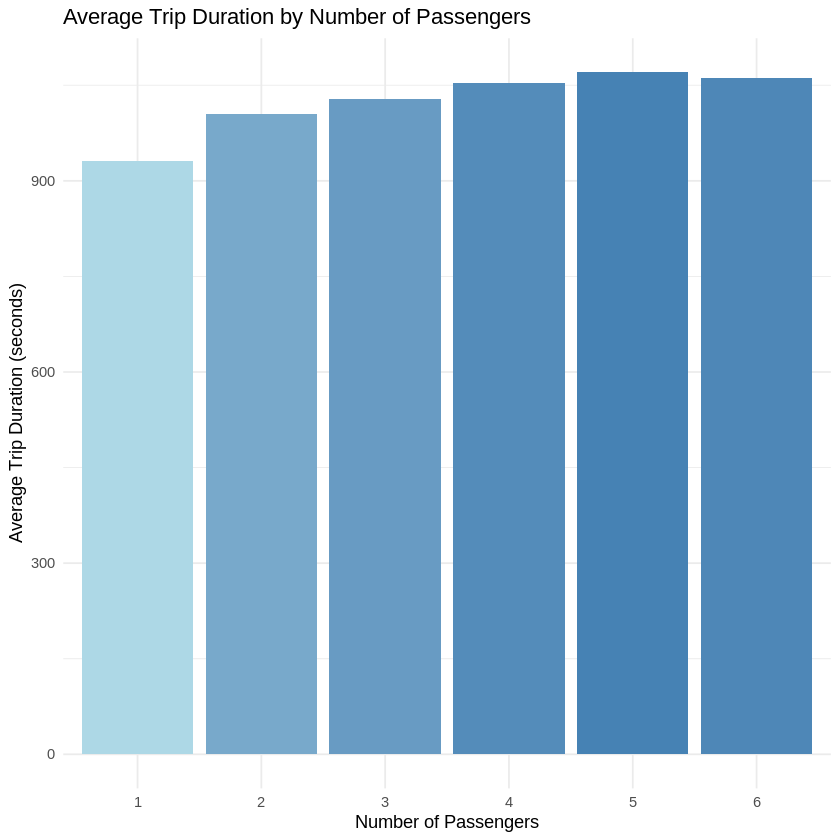

In [ ]:
# Агрегация данных: средняя продолжительность поездки в зависимости от количества пассажиров
avg_trip_duration_by_passenger_count <- train %>%
  group_by(passenger_count) %>%
  summarise(avg_trip_duration = mean(trip_duration)) %>%
  arrange(passenger_count)

# Фильтрация данных для passenger_count от 1 до 6
filtered_avg_trip_duration <- avg_trip_duration_by_passenger_count %>%
  filter(passenger_count >= 1 & passenger_count <= 6)

# Построение столбчатой диаграммы
ggplot(filtered_avg_trip_duration, aes(x = factor(passenger_count), y = avg_trip_duration)) +
  geom_col(aes(fill = avg_trip_duration)) +
  labs(title = "Average Trip Duration by Number of Passengers",
       x = "Number of Passengers",
       y = "Average Trip Duration (seconds)") +
  theme_minimal() +
  theme(legend.position = "none") +
  scale_fill_gradient(low = "lightblue", high = "steelblue")


Изучим распределение поездок между двумя перевозчиками.

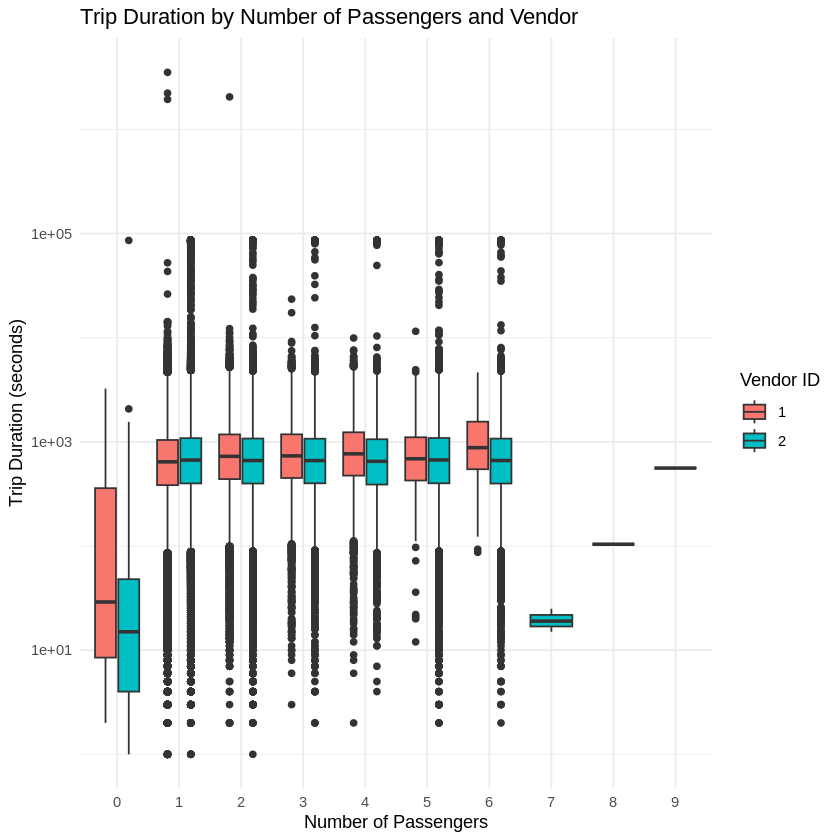

In [ ]:
# Построение boxplot для продолжительности поездки в зависимости от количества пассажиров и поставщиков услуг такси
ggplot(train, aes(x = factor(passenger_count), y = trip_duration, fill = factor(vendor_id))) +
  geom_boxplot() +
  labs(title = "Trip Duration by Number of Passengers and Vendor",
       x = "Number of Passengers",
       y = "Trip Duration (seconds)",
       fill = "Vendor ID") +
  theme_minimal()+
  scale_y_log10()


Ящики с усами показывают, что в целом распределение между 1 и 2 перевозчиками равное, за исключением случаев, когда количество пассажиров равно 0, 7, 8 и 9. О них мы уже говорили.

Также у обоих перевозчиков есть короткие поездки, а поездки с 7, 8 и 9 пассажирами были только у второго.

In [ ]:
# Выбор топ 100 самых продолжительных поездок
top_100_longest_trips <- train %>%
  arrange(desc(trip_duration)) %>%
  slice_head(n = 100) %>%
  select(trip_duration)

# Вывод результата
print(top_100_longest_trips)

# A tibble: 100 × 1
   trip_duration
           <dbl>
 1       3526282
 2       2227612
 3       2049578
 4       1939736
 5         86392
 6         86391
 7         86390
 8         86387
 9         86385
10         86379
# ℹ 90 more rows


Выведем 100 самых продолжительных поездок, чтобы понять, как много из было.

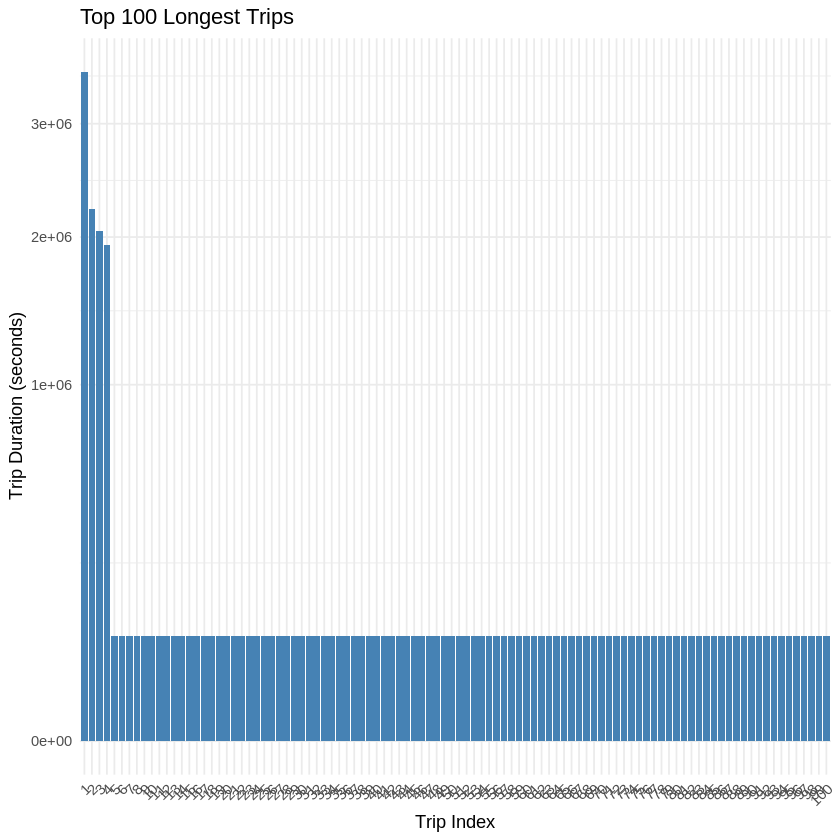

In [ ]:
# Добавление индекса для удобства визуализации
top_100_longest_trips <- top_100_longest_trips %>%
  mutate(index = row_number())

ggplot(top_50_longest_trips, aes(x = factor(index), y = trip_duration)) +
  geom_col(fill = "steelblue") +
  labs(title = "Top 100 Longest Trips",
       x = "Trip Index",
       y = "Trip Duration (seconds)") +
  theme_minimal() +
  scale_y_sqrt() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

Первые 4 значения явно аномальные - первое и вовсе показывает 979 часов. Нужно это учитывать при дальнейшем анализе и предобработке. Также посмотрим на самые короткие поездки:


In [ ]:
# Выбор топ 100 самых коротких поездок
top_100_shortest_trips <- train %>%
  arrange(trip_duration) %>%
  slice_head(n = 100) %>%
  select(trip_duration)

# Вывод результата
print(top_100_shortest_trips)

# A tibble: 100 × 1
   trip_duration
           <dbl>
 1             1
 2             1
 3             1
 4             1
 5             1
 6             1
 7             1
 8             1
 9             1
10             1
# ℹ 90 more rows


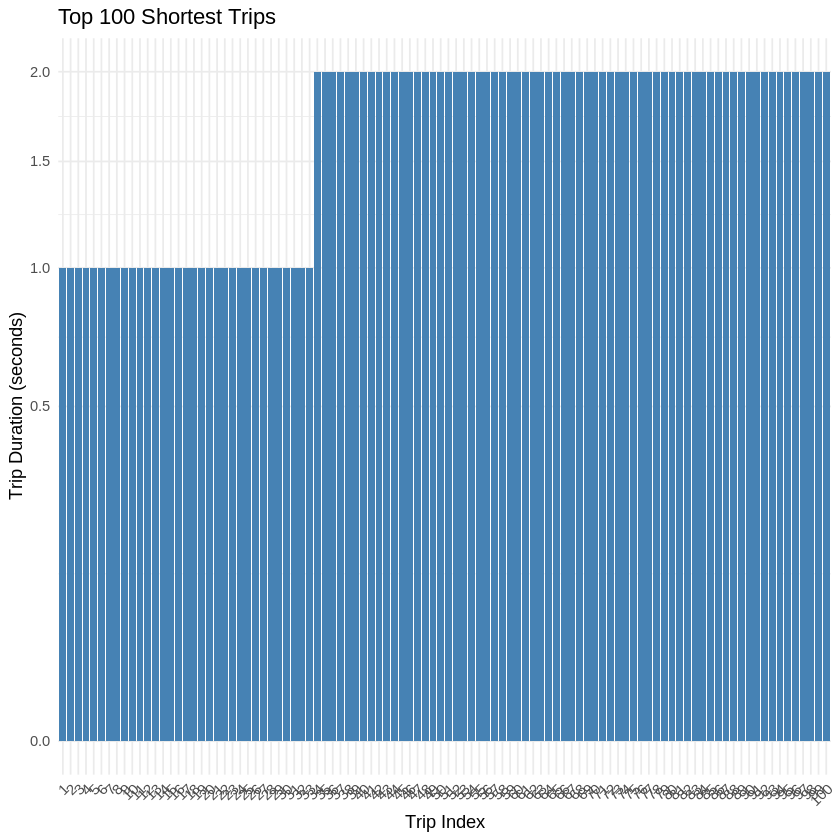

In [ ]:
# Добавление индекса для удобства визуализации
top_100_shortest_trips <- top_100_shortest_trips %>%
  mutate(index = row_number())

ggplot(top_100_shortest_trips, aes(x = factor(index), y = trip_duration)) +
  geom_col(fill = "steelblue") +
  labs(title = "Top 100 Shortest Trips",
       x = "Trip Index",
       y = "Trip Duration (seconds)") +
  theme_minimal() +
  scale_y_sqrt() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

В наборе данных присутствует много поездок, у которых значение продолжительности невозможно низкое. Поэтому для построения модели отберем только те поездки, которые длились, например, не менее 3 минут.

Построим графики зависимости количества поездок от месяца и дня недели:

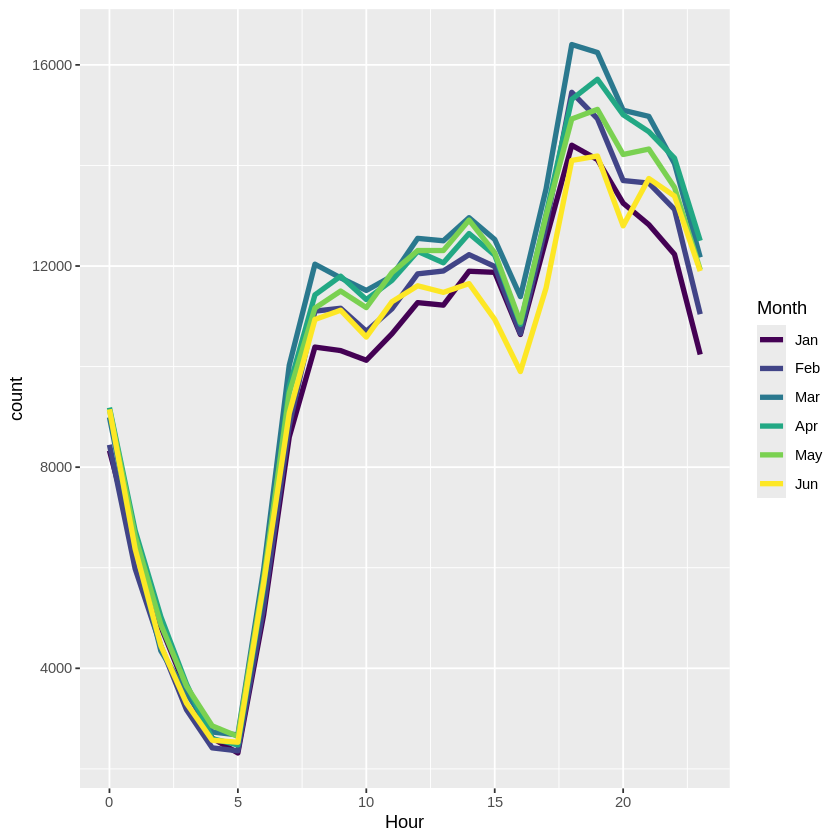

In [ ]:
train %>%
  mutate(hpick = hour(pickup_datetime),
         Month = factor(month(pickup_datetime, label = TRUE))) %>%
  group_by(hpick, Month) %>%
  count() %>%
  ggplot(aes(hpick, n, color = Month)) +
  geom_line(size = 1.5) +
  labs(x = "Hour", y = "count")

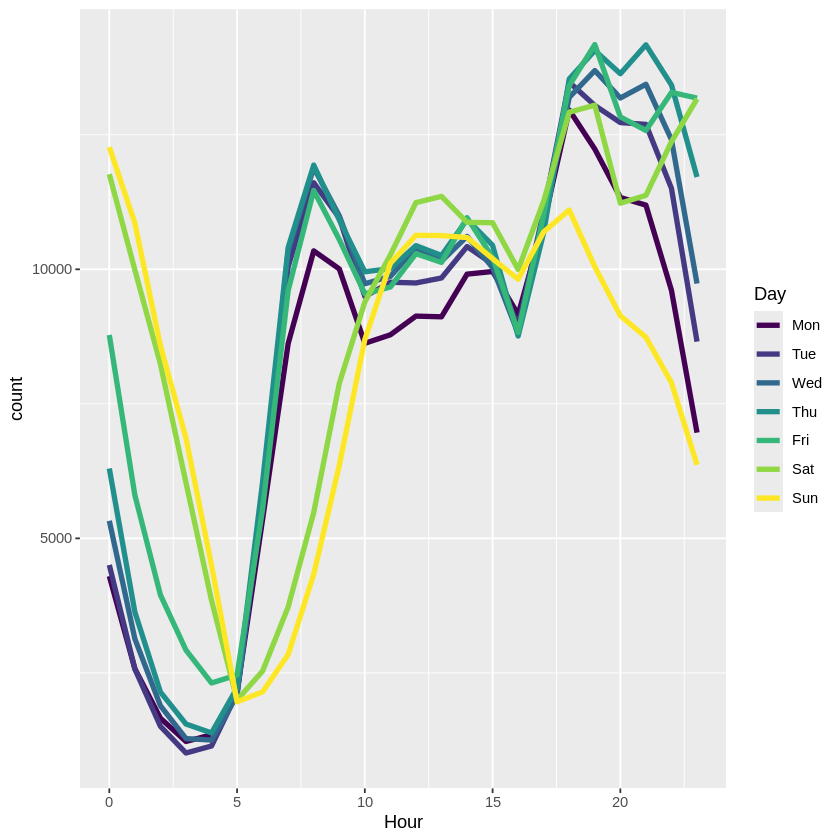

In [ ]:
train %>%
  mutate(hpick = hour(pickup_datetime),
         Day = factor(wday(pickup_datetime, label = TRUE, week_start = 1))) %>%
  group_by(hpick, Day) %>%
  count() %>%
  ggplot(aes(hpick, n, color = Day)) +
  geom_line(size = 1.5) +
  labs(x = "Hour", y = "count")

По субботам, в отличие от всех остальных дней недели, количество поездок начиная с 20 часов вечера увеличивается. Также заметно различие между воскресеньем и остальными днями недели – в этот день люди пользуются такси гораздо меньше, особенно во вторую половину дня.

Проверим на выбросы координаты начала и окончания поездок:

In [ ]:
multiplot <- function(..., plotlist=NULL, file, cols=1, layout=NULL) {

  # Make a list from the ... arguments and plotlist
  plots <- c(list(...), plotlist)

  numPlots = length(plots)

  # If layout is NULL, then use 'cols' to determine layout
  if (is.null(layout)) {
    # Make the panel
    # ncol: Number of columns of plots
    # nrow: Number of rows needed, calculated from # of cols
    layout <- matrix(seq(1, cols * ceiling(numPlots/cols)),
                     ncol = cols, nrow = ceiling(numPlots/cols))
  }

  if (numPlots==1) {
    print(plots[[1]])
  } else {
    # Set up the page
    grid.newpage()
    pushViewport(viewport(layout = grid.layout(nrow(layout), ncol(layout))))

    # Make each plot, in the correct location
    for (i in 1:numPlots) {
      # Get the i,j matrix positions of the regions that contain this subplot
      matchidx <- as.data.frame(which(layout == i, arr.ind = TRUE))

      print(plots[[i]], vp = viewport(layout.pos.row = matchidx$row,
                                      layout.pos.col = matchidx$col))
    }
  }
}

In [ ]:
pickup_centroid <- train %>%
  summarize(
    centroid_longitude = mean(pickup_longitude, na.rm = TRUE),
    centroid_latitude = mean(pickup_latitude, na.rm = TRUE)
  )

dropoff_centroid <- train %>%
  summarize(
    centroid_longitude = mean(dropoff_longitude, na.rm = TRUE),
    centroid_latitude = mean(dropoff_latitude, na.rm = TRUE)
  )

In [ ]:
# Определение диапазонов для осей
pickup_long_range <- range(train$pickup_longitude, na.rm = TRUE)
pickup_lat_range <- range(train$pickup_latitude, na.rm = TRUE)
dropoff_long_range <- range(train$dropoff_longitude, na.rm = TRUE)
dropoff_lat_range <- range(train$dropoff_latitude, na.rm = TRUE)

# Определение центроидов
centroid_longitude <- mean(c(pickup_centroid$centroid_longitude, dropoff_centroid$centroid_longitude))
centroid_latitude <- mean(c(pickup_centroid$centroid_latitude, dropoff_centroid$centroid_latitude))

# Определение границ для осей, чтобы они были симметричны вокруг центроида
long_range <- range(c(pickup_long_range, dropoff_long_range))
lat_range <- range(c(pickup_lat_range, dropoff_lat_range))

long_diff <- diff(long_range) / 2
lat_diff <- diff(lat_range) / 2

xlim <- c(centroid_longitude - long_diff, centroid_longitude + long_diff)
ylim <- c(centroid_latitude - lat_diff, centroid_latitude + lat_diff)


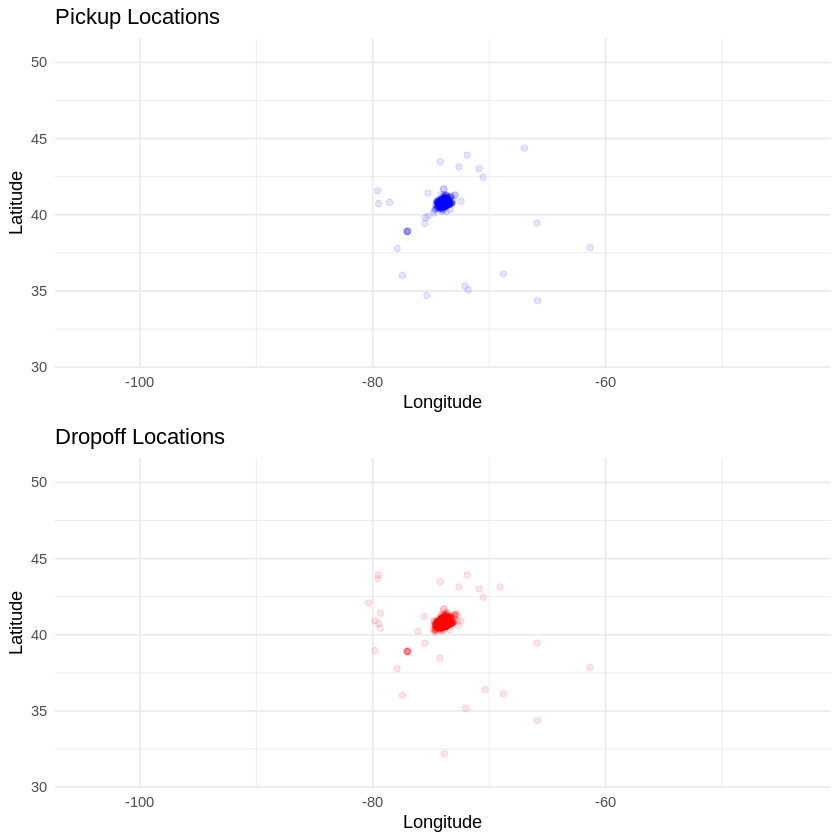

In [ ]:
p1 <- ggplot(train, aes(x = pickup_longitude, y = pickup_latitude)) +
  geom_point(alpha = 0.1, color = "blue") +
  coord_cartesian(xlim = xlim, ylim = ylim) +
  labs(title = "Pickup Locations", x = "Longitude", y = "Latitude") +
  theme_minimal()

p2 <- ggplot(train, aes(x = dropoff_longitude, y = dropoff_latitude)) +
  geom_point(alpha = 0.1, color = "red") +
  coord_cartesian(xlim = xlim, ylim = ylim) +
  labs(title = "Dropoff Locations", x = "Longitude", y = "Latitude") +
  theme_minimal()

# Создание макета
layout <- matrix(c(1,2),2,1,byrow = FALSE)
multiplot(p1, p2, layout = layout)

Создадим новые признаки для моделирования. Из координат ширины и долготы получим пройденное количество километров (`distance`). Это количество не будет являться точным, а всего лишь будет показывать прямое расстояние из точки А в точку Б.

 Также создадим столбец для средней скорости на протяжении поездки с учетом рассчитанной раннее пройденной дистанцией (`speed`). Нужно иметь в виду, что этот столбец тоже не будет точно показывать скорость, поскольку он основан на расстоянии по прямой из начальной точки в конечную.

In [ ]:
# Расстояние между точками (в градусах)
haversine <- function(lon1, lat1, lon2, lat2) {
  R <- 6371  # Радиус Земли в километрах
  dlon <- (lon2 - lon1) * pi / 180
  dlat <- (lat2 - lat1) * pi / 180
  a <- sin(dlat / 2) * sin(dlat / 2) +
      cos(lat1 * pi / 180) * cos(lat2 * pi / 180) *
      sin(dlon / 2) * sin(dlon / 2)
  c <- 2 * atan2(sqrt(a), sqrt(1 - a))
  d <- R * c  # Расстояние в километрах
  return(d)
}

train <- train %>%
  mutate(distance = haversine(pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude))

head(train)

id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance
<chr>,<dbl>,<dttm>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.98215,40.76794,-73.96463,40.76560,N,455,1.498521
id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.98042,40.73856,-73.99948,40.73115,N,663,1.805507
id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.97903,40.76394,-74.00533,40.71009,N,2124,6.385098
id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.01004,40.71997,-74.01227,40.70672,N,429,1.485498
id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.97305,40.79321,-73.97292,40.78252,N,435,1.188588
id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.98286,40.74220,-73.99208,40.74918,N,443,1.098942


И создадим столбец для средней скорости на протяжении поездки:

In [ ]:
train <- train %>%
  mutate(speed = distance/(trip_duration/3600))

head(train)

id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,speed
<chr>,<dbl>,<dttm>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.98215,40.76794,-73.96463,40.76560,N,455,1.498521,11.856428
id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.98042,40.73856,-73.99948,40.73115,N,663,1.805507,9.803659
id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.97903,40.76394,-74.00533,40.71009,N,2124,6.385098,10.822201
id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.01004,40.71997,-74.01227,40.70672,N,429,1.485498,12.465721
id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.97305,40.79321,-73.97292,40.78252,N,435,1.188588,9.836594
id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.98286,40.74220,-73.99208,40.74918,N,443,1.098942,8.930458


Посмотрим на плотность распределения дистанции с прологарифмированной осью ординат:

Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 3768 rows containing missing values or values outside the scale range
(`geom_bar()`).”


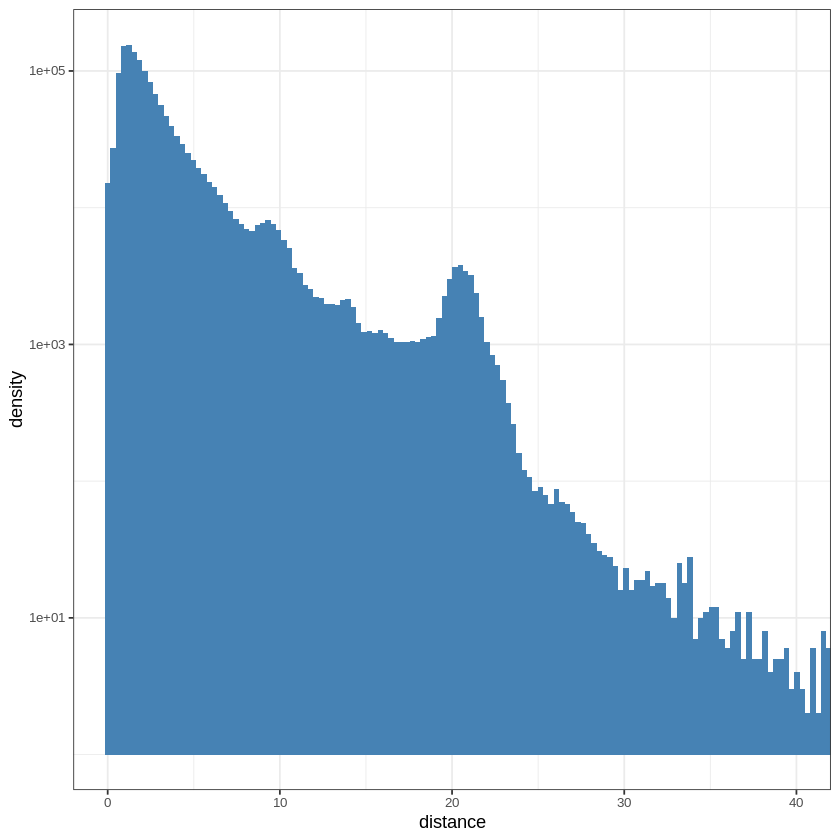

In [ ]:
train %>%
  ggplot(aes(x=distance)) +
  geom_histogram(bins=4000, fill="steelblue")+
  theme_bw()+theme(axis.title = element_text(size=11),axis.text = element_text(size=8))+
  ylab("density")+
  coord_cartesian(x=c(0,40)) +
  scale_y_log10()

In [ ]:
summary(train$distance)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   0.000    1.232    2.094    3.441    3.875 1240.909 

Чаще всего поездки совершались на 2-3 км. Теперь построим аналогичный график для скорости:

Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 4838 rows containing missing values or values outside the scale range
(`geom_bar()`).”


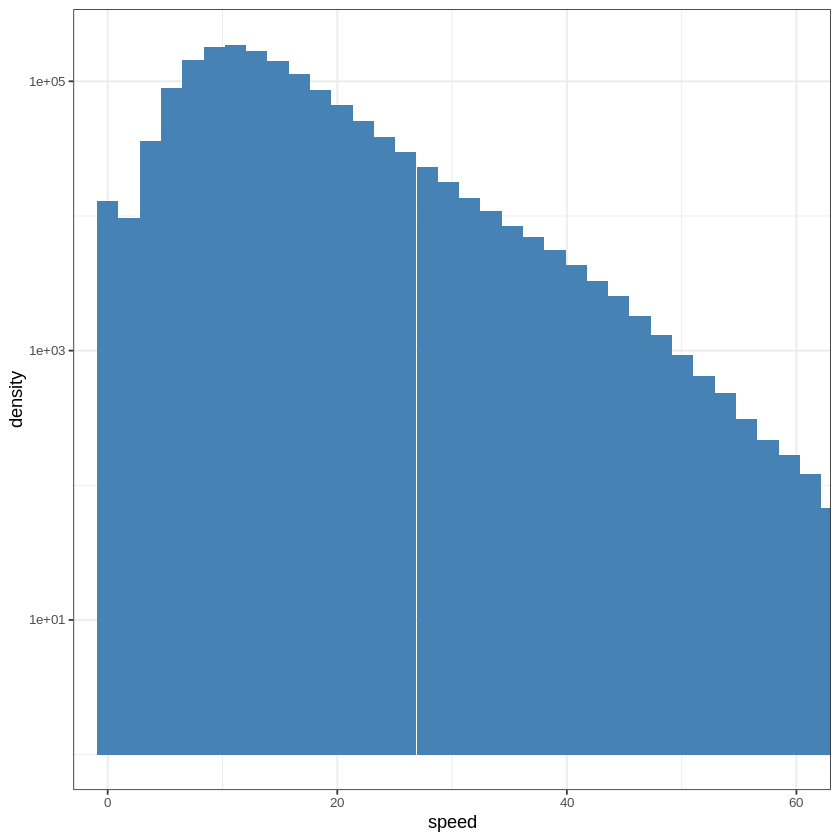

In [ ]:
train %>%
  ggplot(aes(x=speed)) +
  geom_histogram(bins=5000, fill="steelblue")+
  theme_bw()+theme(axis.title = element_text(size=11),axis.text = element_text(size=8))+
  ylab("density")+
  coord_cartesian(x=c(0,60)) +
  scale_y_log10()

In [ ]:
summary(train$speed)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   0.000    9.121   12.792   14.423   17.845 9274.837 

Чаще всего таксисты ехали со скоростью 15 км/ч. Зафиксируем аномалию - 9274 км/ч.

Проверим, как изменялась средняя скорость в течение дня:

`geom_smooth()` using formula = 'y ~ x'


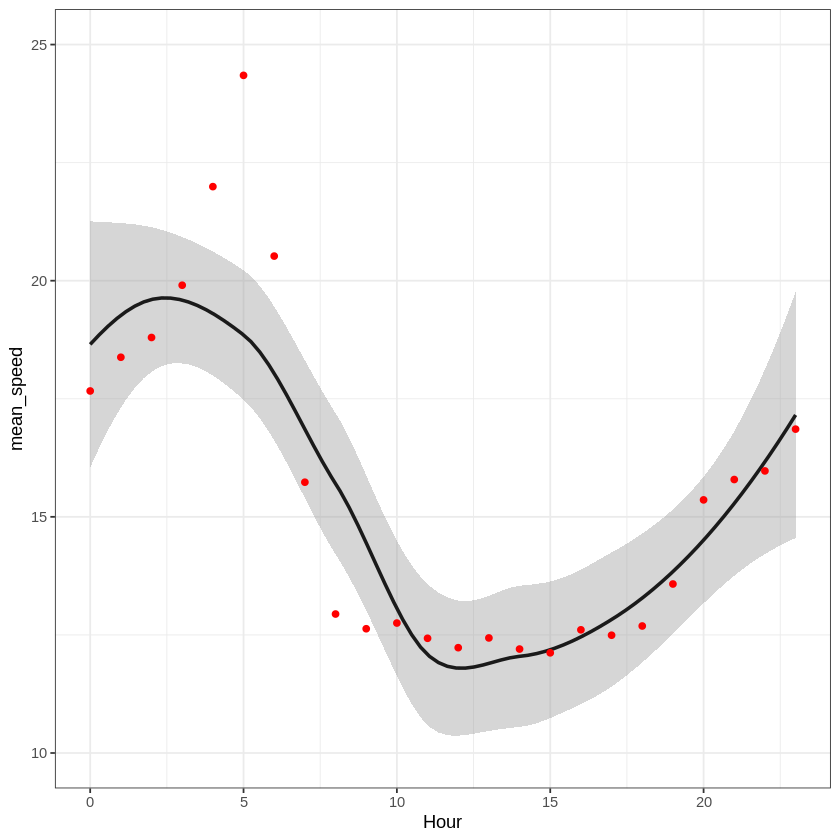

In [ ]:
train %>%
  group_by(Hour = hour(pickup_datetime)) %>%
  summarize(mean_speed = mean(speed),n()) %>%
  ggplot(aes(x=Hour,y=mean_speed))+
  geom_smooth(method = 'loess',color="grey10")+
  geom_point(color="red")+coord_cartesian(ylim=c(10,25))+theme_bw()

Ожидаемо, ночью машины двигаются быстрее, чем в большой поток днем.

Посмотрим, различается ли средняя продолжительность поездки у разных перевозчиков.

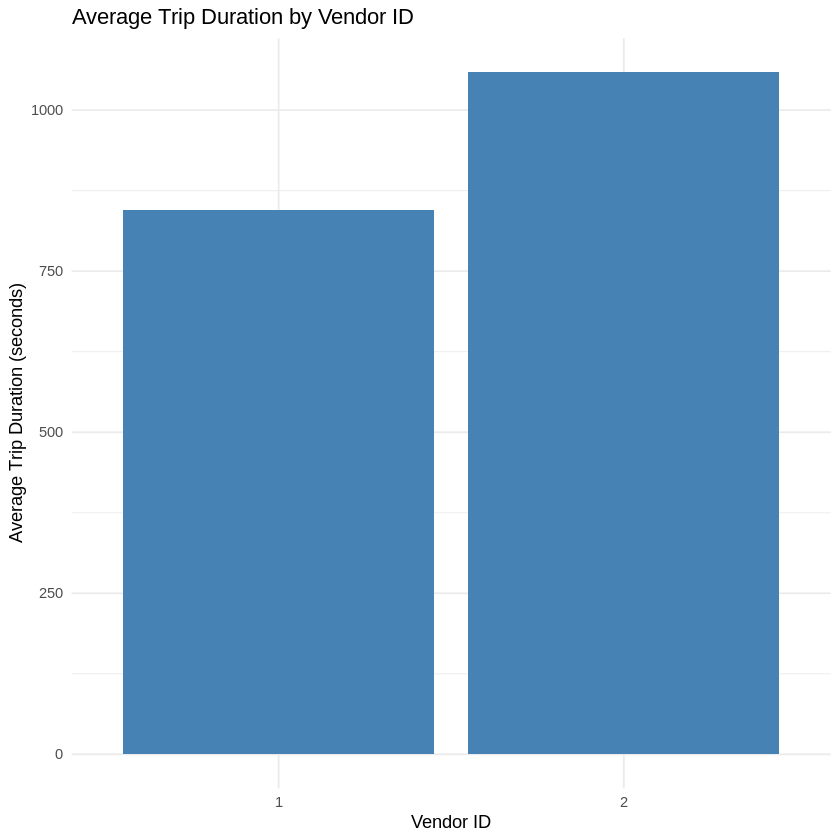

In [ ]:
# Агрегация данных: средняя продолжительность поездки по vendor_id
avg_trip_duration_by_vendor <- train %>%
  group_by(vendor_id) %>%
  summarise(avg_trip_duration = mean(trip_duration)) %>%
  arrange(vendor_id)

# Построение графика
ggplot(avg_trip_duration_by_vendor, aes(x = factor(vendor_id), y = avg_trip_duration)) +
  geom_col(fill = "steelblue") +
  labs(title = "Average Trip Duration by Vendor ID",
       x = "Vendor ID",
       y = "Average Trip Duration (seconds)") +
  theme_minimal()

В среднем у второго перевозчика более продолжительные поездки. Однако нужен более детальный анализ, так как на это могли повлиять аномалии или некачественные данные. Выведем топ-10 самых долгих поездок для каждого перевозчика.

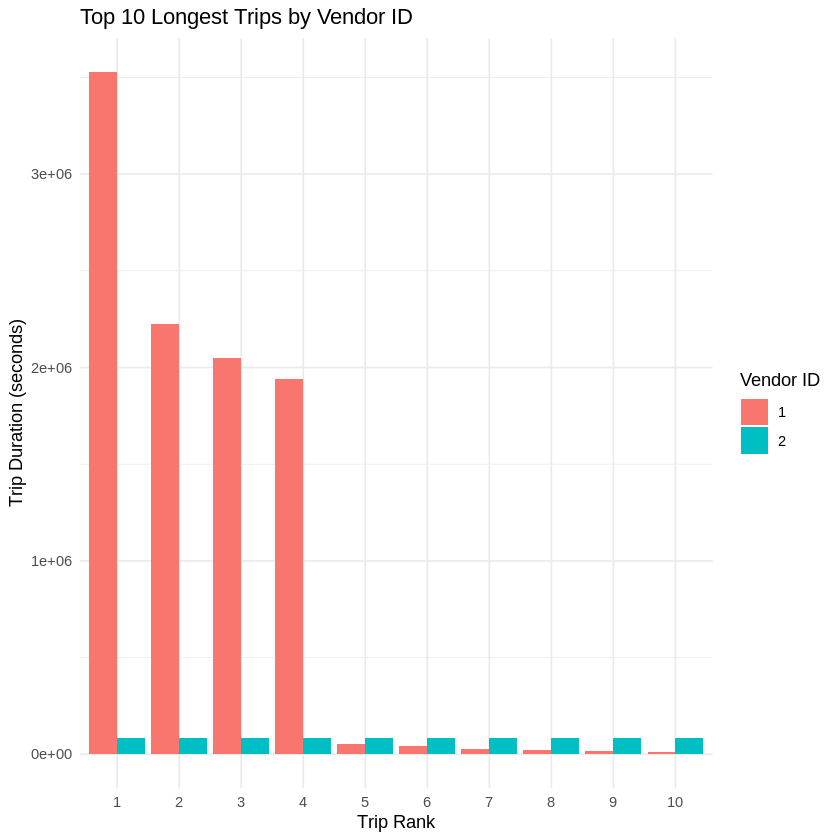

In [ ]:
# Функция для отбора топ N самых продолжительных поездок для каждого vendor_id
top_n_trips <- function(data, n) {
  data %>%
    group_by(vendor_id) %>%
    top_n(n, trip_duration) %>%
    arrange(vendor_id, desc(trip_duration)) %>%
    mutate(rank = row_number())
}

# Отбор 10 самых продолжительных поездок для каждого vendor_id
top_10_trips <- top_n_trips(train, 10)

# Построение графика
ggplot(top_10_trips, aes(x = factor(rank), y = trip_duration, fill = factor(vendor_id))) +
  geom_col(position = position_dodge()) +
  labs(title = "Top 10 Longest Trips by Vendor ID",
       x = "Trip Rank",
       y = "Trip Duration (seconds)",
       fill = "Vendor ID") +
  theme_minimal()

Заметим, что у первого перевозчика 4 самые долгие поездки (которые похожи на аномалии), но после них преимущество забирает второй перевозчик. Возможно, при очистке данных разница между средней продолжительностью и перевозчиком изменится.

На основе вышеперечисленных наблюдений можно сформулировать требования для очистки датасета. Отфильтруем данные следующим образом:
1.	Продолжительность поездки от 180 до 36000 секунд.
2.	Пройденная дистанция от 0,5 до 500 км.
3.	Количество пассажиров от 1 до 6.
4.	Скорость не равна нулю и не превышает 150 км/ч.


In [ ]:
filtered_train <- train %>%
  filter(trip_duration < 36000 & trip_duration > 180) %>%
  filter(distance > 0.5 & distance < 500)  %>%
  filter(passenger_count > 0 & passenger_count < 7) %>%
  filter(speed > 0 & speed < 150)

Выведем среднюю продолжительность поездки для каждого перевозчика после фильтрации.

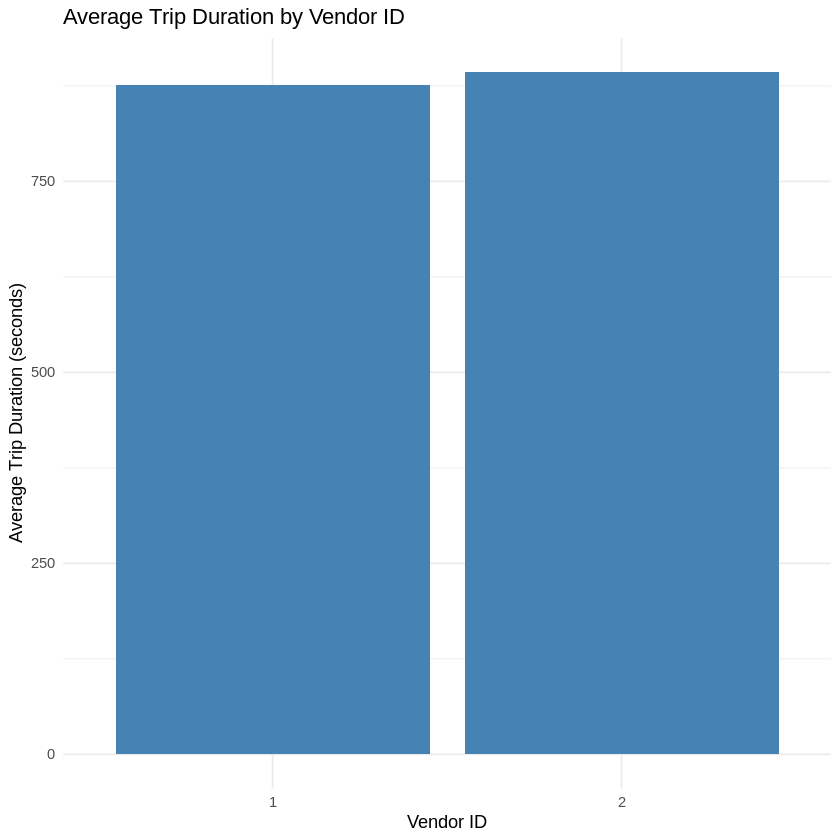

In [ ]:
# Агрегация данных: средняя продолжительность поездки по vendor_id
avg_trip_duration_by_vendor_filtered <- filtered_train %>%
  group_by(vendor_id) %>%
  summarise(avg_trip_duration = mean(trip_duration)) %>%
  arrange(vendor_id)

# Построение графика
ggplot(avg_trip_duration_by_vendor_filtered, aes(x = factor(vendor_id), y = avg_trip_duration)) +
  geom_col(fill = "steelblue") +
  labs(title = "Average Trip Duration by Vendor ID",
       x = "Vendor ID",
       y = "Average Trip Duration (seconds)") +
  theme_minimal()

Значения выровнялись, поэтому признак vendor_id не будет влиять на результат, и следовательно мы можем его не рассматривать при реализации модели.

Построим матрицу корреляции для столбцов `trip_duration`, `passenger_count`, `distance`, `speed`, `pickup_hour`, `pickup_day`, `pickup_month`.


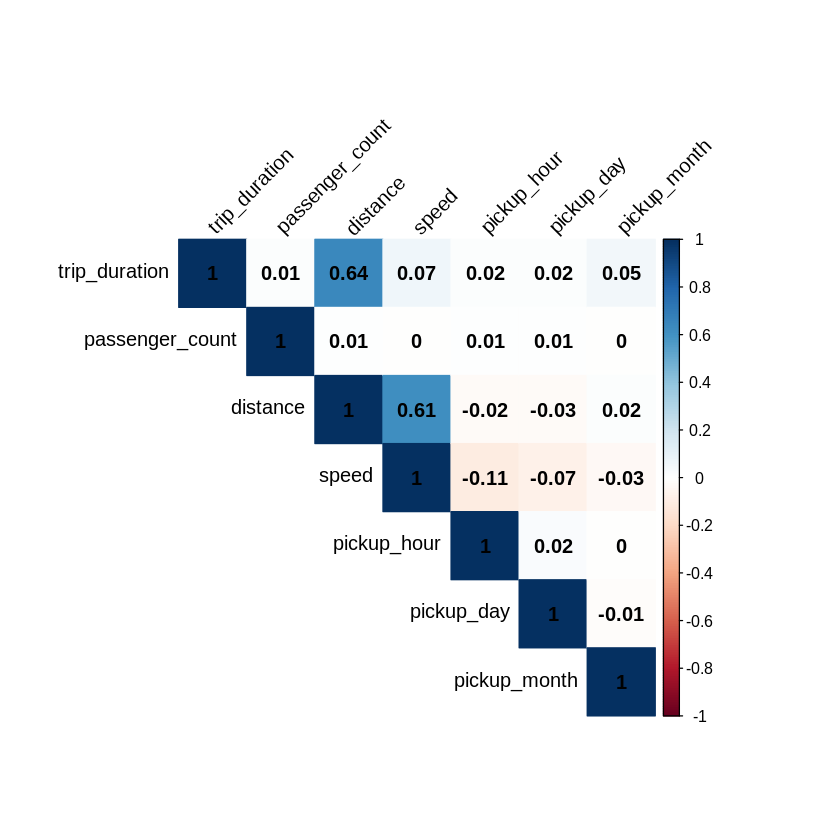

In [ ]:
# Выбор определенных столбцов
selected_vars <- filtered_train %>% select(trip_duration, passenger_count, distance, speed, pickup_hour, pickup_day, pickup_month)

# Преобразование столбцов pickup_day, pickup_month к числовому типу
selected_vars <- selected_vars %>%
  mutate(across(everything(), as.numeric))

# Расчет матрицы корреляции для выбранных столбцов
cor_matrix <- cor(selected_vars, use = "complete.obs")

# Визуализация матрицы корреляции
corrplot(cor_matrix, method = "color", type = "upper", tl.col = "black", tl.srt = 45, addCoef.col = "black")

In [ ]:
# Округление значений матрицы корреляции для лучшей читабельности
rounded_cor_matrix <- round(cor_matrix, 2)

# Вывод матрицы корреляции в текстовом виде
print(rounded_cor_matrix)

                trip_duration passenger_count distance speed pickup_hour
trip_duration            1.00            0.01     0.64  0.07        0.02
passenger_count          0.01            1.00     0.01  0.00        0.01
distance                 0.64            0.01     1.00  0.61       -0.02
speed                    0.07            0.00     0.61  1.00       -0.10
pickup_hour              0.02            0.01    -0.02 -0.10        1.00
pickup_day               0.02            0.01    -0.03 -0.07        0.02
pickup_month             0.05            0.00     0.02 -0.03        0.00
                pickup_day pickup_month
trip_duration         0.02         0.05
passenger_count       0.01         0.00
distance             -0.03         0.02
speed                -0.07        -0.03
pickup_hour           0.02         0.00
pickup_day            1.00        -0.01
pickup_month         -0.01         1.00


У продолжительности поездки значительная положительная корреляция с дистанцией (0,64) – чем больше расстояние, тем дольше длится поездка. Также есть небольшая положительная корреляция с признаками скорости и месяца поездки (0,07 и 0,05 соответственно). У дистанции сильная положительная скорость со скоростью (0,61) – чем больше расстояние, тем выше средняя скорость.

Другие переменные, такие как количество пассажиров, час начала поездки, день недели, имеют минимальное влияние на продолжительность поездки и расстояние.

После выполнения предобработки и очистки данных, наш набор данных готов к использованию для моделирования. На этом этапе мы устранили выбросы, преобразовали временные метки в более полезные форматы, такие как часы, дни и месяцы, а также создали новые признаки – `distance` и `speed`. Эти шаги обеспечили качество и целостность данных, что является важным для построения надежных и точных моделей. Теперь мы можем перейти к разработке модели линейной регрессии с использованием методики Elastic Net для прогнозирования продолжительности поездки в такси.


## Модель линейной регрессии с применением методики Elastic Net


Для устранения выбросов и улучшения качества модели, исходные данные были фильтрованы на основе 25-го и 75-го квантилей по следующим признакам: `distance`, `speed` и `trip_duration`. Полученные значения удовлетворяют диапазону, который мы сами задали на основе анализа данных. Фильтрация данных позволяет сфокусироваться на более типичных значениях, что помогает повысить устойчивость модели к экстремальным значениям.

In [ ]:
# Рассчитываем квартили для столбцов
trip_duration_q25 <- quantile(train$trip_duration, 0.25)
trip_duration_q75 <- quantile(train$trip_duration, 0.75)

distance_q25 <- quantile(train$distance, 0.25)
distance_q75 <- quantile(train$distance, 0.75)

speed_q25 <- quantile(train$speed, 0.25)
speed_q75 <- quantile(train$speed, 0.75)

# Вывод значений квантилей
cat("25-й и 75-й квантили для trip_duration:\n")
print(trip_duration_q25)
print(trip_duration_q75)

cat("\n25-й и 75-й квантили для distance:\n")
print(distance_q25)
print(distance_q75)

cat("\n25-й и 75-й квантили для speed:\n")
print(speed_q25)
print(speed_q75)

25-й и 75-й квантили для trip_duration:
25% 
397 
 75% 
1075 

25-й и 75-й квантили для distance:
     25% 
1.231837 
     75% 
3.875337 

25-й и 75-й квантили для speed:
     25% 
9.121275 
     75% 
17.84491 


In [ ]:
filtered_train <- train %>%
  filter(trip_duration > trip_duration_q25 & trip_duration < trip_duration_q75) %>%
  filter(distance > distance_q25 & distance < distance_q75) %>%
  filter(speed > speed_q25 & speed < speed_q75) %>%
  filter(passenger_count > 0 & passenger_count < 7)

Для дальнейшего моделирования была выбрана случайная выборка из 100000 записей. Использование случайной выборки позволяет снизить вычислительные затраты при сохранении репрезентативности данных.

Для оценки качества модели данные были разделены на обучающую и тестовую выборки в соотношении 70/30. Это позволяет обучить модель на одной части данных и проверить её на другой, не пересекающейся части.

Для обучения модели и прогнозирования были подготовлены матрицы признаков (`X_train`, `X_test`) и целевой переменной (`Y_train`, `Y_test`). В качестве признаков были выбраны: `distance`, `passenger_count`, `speed`, `pickup_hour`, `pickup_day`, `pickup_month`.

После обучения модели была проведена оценка её качества на тестовой выборке. Рассчитанные метрики включали: Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), R-squared (R2) и Mean Absolute Percentage Error (MAPE), а также определены значения alpha и lambda.

In [ ]:
# Преобразование столбцов pickup_day, pickup_month к числовому типу
filtered_train <- filtered_train %>%
  mutate(across(everything(), as.numeric))

# Выбор определенных столбцов
selected_vars <- filtered_train %>%
  select(trip_duration, passenger_count, distance, speed, pickup_hour, pickup_day, pickup_month)

# Выбор случайной выборки из 100000 записей
set.seed(123)  # Для воспроизводимости результатов
sampled_train <- selected_vars %>%
  sample_n(100000)

# Разделение данных на обучающую и тестовую выборки (70/30)
set.seed(123)
train_index <- createDataPartition(sampled_train$trip_duration, p = 0.7, list = FALSE)
train_data <- sampled_train[train_index, ]
test_data <- sampled_train[-train_index, ]

# Подготовка данных для модели
X_train <- train_data %>%
  select(distance, passenger_count, speed, pickup_hour, pickup_day, pickup_month) %>%
  as.matrix()
Y_train <- train_data %>%
  select(trip_duration) %>%
  as.matrix()

X_test <- test_data %>%
  select(distance, passenger_count, speed, pickup_hour, pickup_day, pickup_month) %>%
  as.matrix()
Y_test <- test_data %>%
  select(trip_duration) %>%
  as.matrix()

# Обучение модели Elastic Net
control <- trainControl(method = "repeatedcv",
                        number = 5,
                        repeats = 5,
                        search = "random",
                        verboseIter = TRUE)

elastic_model <- train(trip_duration ~ .,
                       data = train_data,
                       method = "glmnet",
                       preProcess = c("center", "scale"),
                       tuneLength = 25,
                       trControl = control)

# Прогнозирование на тестовой выборке
predictions <- predict(elastic_model, X_test)

# Оценка качества модели
MAE <- mean(abs(predictions - Y_test))
MSE <- mean((predictions - Y_test)^2)
RMSE <- sqrt(MSE)
R2 <- cor(predictions, Y_test)^2
MAPE <- mean(abs((predictions - Y_test) / Y_test)) * 100

# Вывод метрик
cat("Mean Absolute Error (MAE): ", MAE, "\n")
cat("Mean Squared Error (MSE): ", MSE, "\n")
cat("Root Mean Squared Error (RMSE): ", RMSE, "\n")
cat("R-squared (R²): ", R2, "\n")
cat("Mean Absolute Percentage Error (MAPE): ", MAPE, "%\n")

Warning message:
“There were 2 warnings in `mutate()`.
The first warning was:
ℹ In argument: `across(everything(), as.numeric)`.
Caused by warning:
! NAs introduced by coercion
ℹ Run `dplyr::last_dplyr_warnings()` to see the 1 remaining warning.”


 num [1:70002, 1:6] 2.31 2.15 2.07 1.28 2.88 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:6] "distance" "passenger_count" "speed" "pickup_hour" ...
 num [1:70002, 1] 664 783 633 446 913 673 498 514 497 650 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr "trip_duration"
+ Fold1.Rep1: alpha=0.51146, lambda=0.601662 
- Fold1.Rep1: alpha=0.51146, lambda=0.601662 
+ Fold1.Rep1: alpha=0.31034, lambda=0.038709 
- Fold1.Rep1: alpha=0.31034, lambda=0.038709 
+ Fold1.Rep1: alpha=0.67648, lambda=4.213703 
- Fold1.Rep1: alpha=0.67648, lambda=4.213703 
+ Fold1.Rep1: alpha=0.42772, lambda=0.005248 
- Fold1.Rep1: alpha=0.42772, lambda=0.005248 
+ Fold1.Rep1: alpha=0.20441, lambda=0.017513 
- Fold1.Rep1: alpha=0.20441, lambda=0.017513 
+ Fold1.Rep1: alpha=0.42929, lambda=0.020292 
- Fold1.Rep1: alpha=0.42929, lambda=0.020292 
+ Fold1.Rep1: alpha=0.52922, lambda=0.046254 
- Fold1.Rep1: alpha=0.52922, lambda=0.046254 
+ Fold1.Rep1: alpha=0.65343, lambda=6.336949 
- Fold

Разберем каждый параметр из метода обучения модели подробно:

1. **method**: Это параметр, который определяет метод обучения модели. В данном случае, установлено значение "glmnet", что указывает на использование метода регрессии Elastic Net.

2. **train_data**: Это наша обучающая выборка данных, содержащая признаки (независимые переменные) и целевую переменную (trip_duration), на основе которых модель будет обучаться.

3. **preProcess**: Этот параметр определяет предварительную обработку данных, которая будет применена перед обучением модели. Здесь указаны операции "центрирование" и "масштабирование" данных. Центрирование означает вычитание среднего значения из каждого признака, а масштабирование означает деление каждого признака на его стандартное отклонение.

4. **tuneLength**: Этот параметр определяет количество комбинаций гиперпараметров, которые будут рассмотрены при настройке модели. В данном случае, установлено значение 25, что означает, что будет рассмотрено 25 комбинаций гиперпараметров.

5. **trControl**: Это параметр, который определяет настройки контроля обучения модели. В данном случае, установлены следующие значения:
   - **method = "repeatedcv"**: Это метод кросс-валидации с повторениями, который используется для оценки качества модели. Он разбивает обучающую выборку на несколько подвыборок (фолдов) и выполняет обучение модели на каждой из них, используя остальные для валидации.
   - **number = 5**: Это количество фолдов, на которое будет разбита обучающая выборка. Здесь указано 5 фолдов.
   - **repeats = 5**: Это количество повторений кросс-валидации. Здесь указано 5 повторений.
   - **search = "random"**: Это метод поиска оптимальных гиперпараметров модели. В данном случае, используется случайный поиск.
   - **verboseIter = TRUE**: Это параметр, который определяет, будет ли выводиться информация о ходе процесса обучения.

После указания всех параметров, функция train() выполняет обучение модели на обучающих данных train_data с использованием указанных метода, предобработки данных и настроек контроля. Полученная модель сохраняется в переменной elastic_model и готова к использованию для прогнозирования на новых данных.

В процессе кросс-валидации были определены оптимальные значения гиперпараметров для нашей модели Elastic Net: **alpha = 0,38** и **lambda = 0,168**. Эти гиперпараметры играют ключевую роль в балансе между регуляризацией и точностью модели.

Значение alpha определяет вес между L1 (Lasso) и L2 (Ridge) регуляризацией. Значение 0,38 указывает на то, что наша модель использует как L1, так и L2 регуляризацию, с небольшим смещением в сторону L2 регуляризации. Это помогает модели быть устойчивой к переобучению, одновременно сохраняя простоту и интерпретируемость.

Значение lambda регулирует степень регуляризации. Чем больше значение lambda, тем сильнее регуляризация, что может уменьшить сложность модели, но также может привести к недообучению. Значение 0,168 указывает на умеренную степень регуляризации, что способствует хорошему балансу между сложностью модели и ее способностью обобщать на новых данных.

На основе полученных метрик качества модели можно сделать следующие выводы:
1.	Mean Absolute Error (MAE): 21,34.
Это означает, что в среднем прогнозируемая продолжительность поездки отклоняется от фактической на 21.34 секунды.
2.	Mean Squared Error (MSE): 791,66.
Эта метрика показывает среднее квадратичное отклонение прогнозов от фактических значений. Низкое значение указывает на хорошее соответствие модели.
3.	Root Mean Squared Error (RMSE): 28,14.
Эта метрика является квадратным корнем из MSE и измеряет среднюю ошибку модели. Низкое значение RMSE свидетельствует о высокой точности модели.
4.	R-squared (R²): 0,9735.
Коэффициент детерминации показывает, что 97,35% вариации в данных объясняется моделью, что указывает на высокую степень соответствия модели данным.
5.	Mean Absolute Percentage Error (MAPE): 3,42%.
Эта метрика показывает среднее абсолютное отклонение прогнозируемых значений от фактических в процентах. Низкое значение MAPE указывает на высокую точность модели.

Таким образом, модель демонстрирует высокое качество прогнозирования и хорошо справляется с задачей предсказания продолжительности поездки.

Далее модель была использована для прогнозирования продолжительности поездок на тестовой выборке. Полученные прогнозы были сопоставлены с фактическими значениями для оценки точности модели при помощи графиков.



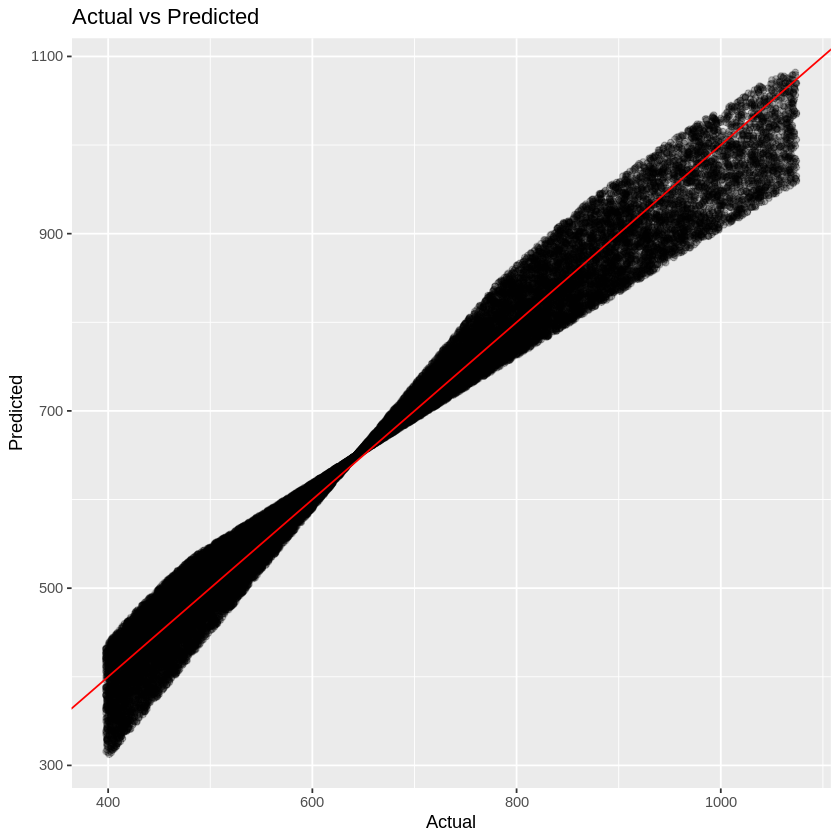

In [ ]:
# Диаграмма значений
ggplot(data = test_data, aes(x = Y_test, y = predictions)) +
  geom_point(alpha=0.25) +
  geom_abline(intercept = 0, slope = 1, color = "red") +
  labs(x = "Actual", y = "Predicted") +
  ggtitle("Actual vs Predicted")

На тестовой выборке результат отличный – прямая отлично описывает набор точек. Рассмотрим диаграмму остатков. Она показывает разницу между фактическими значениями и предсказанными значениями модели.

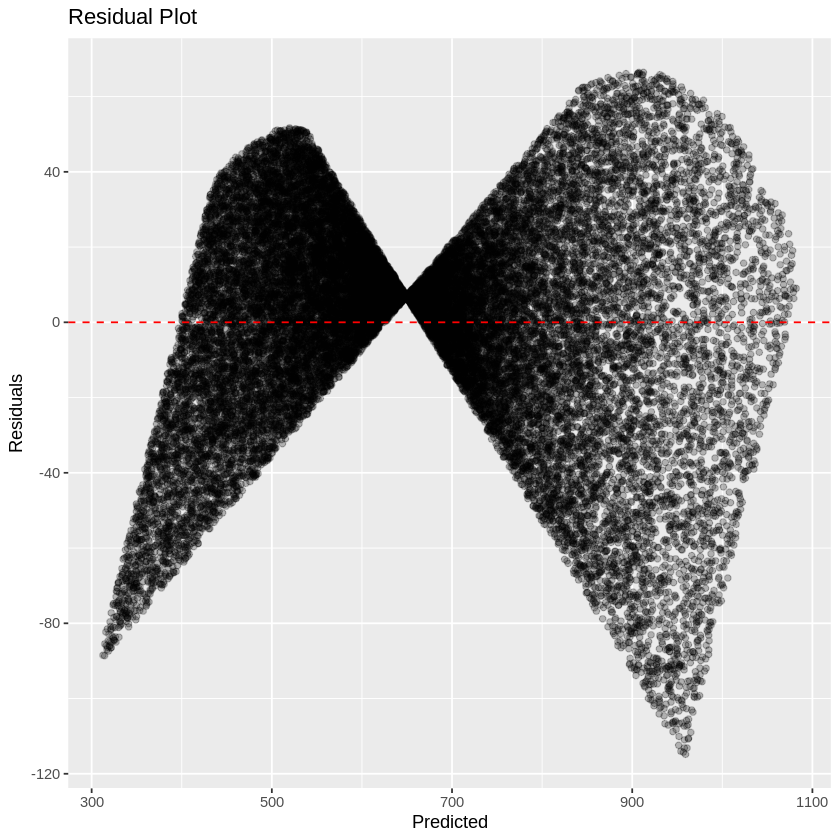

In [ ]:
# Диаграмма остатков
ggplot(data = test_data, aes(x = predictions, y = predictions - Y_test)) +
  geom_point(alpha=0.25) +
  geom_hline(yintercept = 0, linetype = "dashed", color="red") +
  labs(x = "Predicted", y = "Residuals") +
  ggtitle("Residual Plot")

Гистограмма распределения ошибок поможет увидеть самые распространенные значения ошибок.

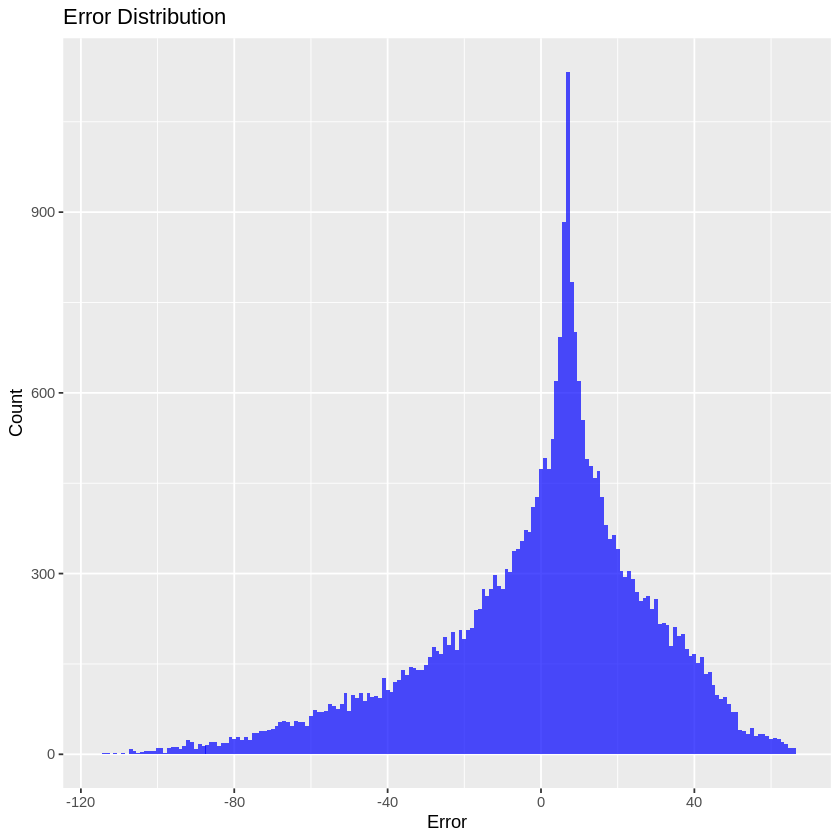

In [ ]:
# Гистограмма ошибок
ggplot(data = test_data, aes(x = predictions - Y_test)) +
  geom_histogram(binwidth = 1, fill = "blue", alpha = 0.7) +
  labs(x = "Error", y = "Count") +
  ggtitle("Error Distribution")

Чаще всего прогнозы модели отличались примерно на 15-20 секунд от фактического значения.

Визуализируем поиск гиперпараметров.

`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


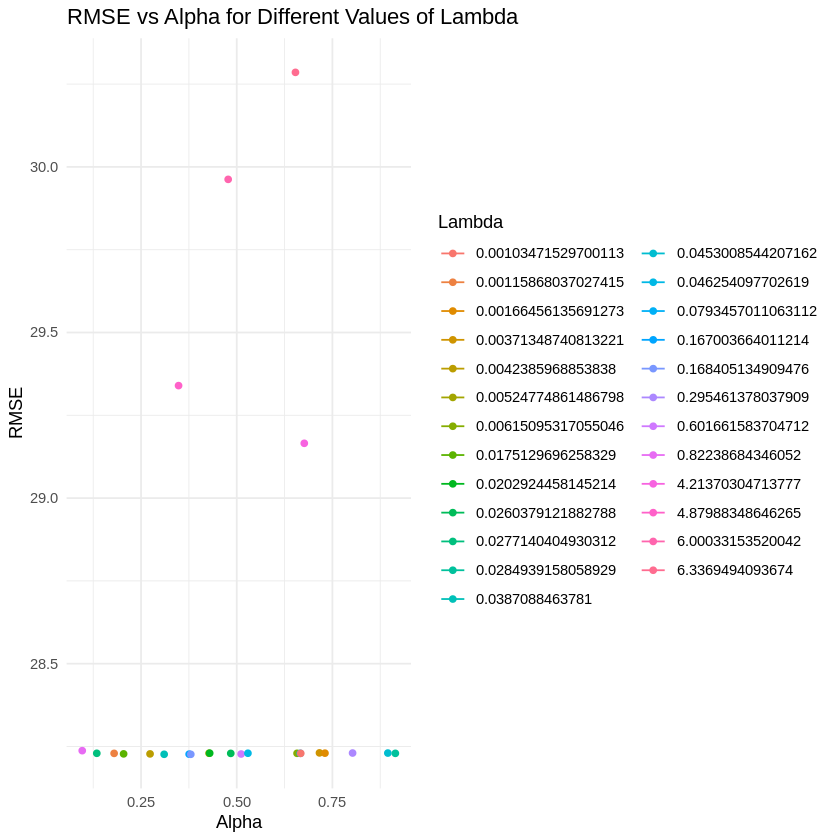

In [ ]:
# Extract the results from the model training
results <- elastic_model$results

# Plot the alpha vs. RMSE
ggplot(results, aes(x = alpha, y = RMSE, color = as.factor(lambda))) +
  geom_point() +
  geom_line() +
  labs(title = "RMSE vs Alpha for Different Values of Lambda",
       x = "Alpha",
       y = "RMSE",
       color = "Lambda") +
  theme_minimal()

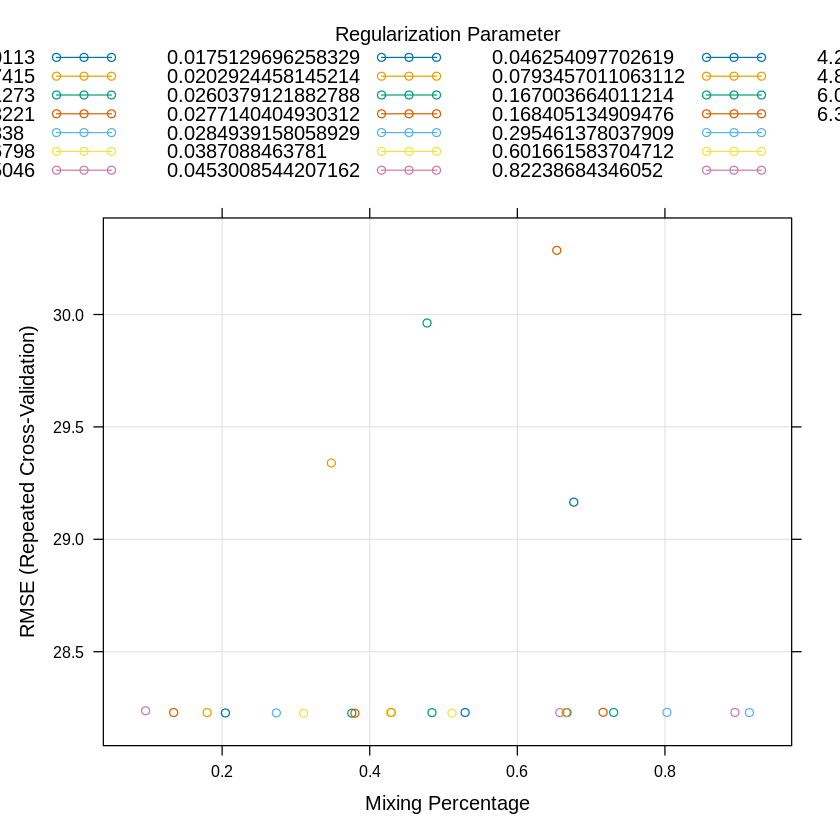

In [ ]:
# Визуализация поиска гиперпараметров
plot(elastic_model)

Атрибут `results` содержит результаты всех комбинаций гиперпараметров, рассмотренных во время настройки модели. Каждая строка в этом атрибуте представляет одну комбинацию гиперпараметров, а столбцы содержат информацию о значении гиперпараметров и метриках качества модели.

Таким образом, мы получим таблицу с информацией о каждой рассмотренной комбинации гиперпараметров и соответствующих метриках качества модели, таких как MAE, MSE, RMSE, R-squared и MAPE.

In [ ]:
results

,alpha,lambda,RMSE,Rsquared,MAE,RMSESD,RsquaredSD,MAESD
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.09630537,0.822386843,28.23732,0.9735378,21.38703,0.1471584,0.0002456082,0.1107879
2,0.13433021,0.027714040,28.22938,0.9735383,21.38362,0.1467420,0.0002456526,0.1110010
3,0.17961508,0.001158680,28.22915,0.9735382,21.38307,0.1465843,0.0002454666,0.1108807
4,0.20440705,0.017512970,28.22764,0.9735383,21.38231,0.1464739,0.0002454413,0.1109050
5,0.27348826,0.004238597,28.22756,0.9735380,21.38168,0.1462968,0.0002452385,0.1107503
6,0.31034122,0.038708846,28.22638,0.9735380,21.38100,0.1461592,0.0002451455,0.1107164
7,0.34799609,4.879883486,29.33960,0.9733897,21.97928,0.1773070,0.0002377838,0.1113728
8,0.37566786,0.167003664,28.22673,0.9735374,21.38069,0.1459720,0.0002448430,0.1104881
9,0.37991752,0.168405135,28.22629,0.9735375,21.38052,0.1459519,0.0002448521,0.1105077


In [ ]:
# Вывод лучших гиперпараметров
best_params <- elastic_model$bestTune
print(best_params)

      alpha    lambda
9 0.3799175 0.1684051


Возьмем весь набор данных, обрезанный с 10 по 90 квантиль по столбцам `trip_duration`, `distance` и `speed`.

In [ ]:
# Вычисление квантилей для trip_duration, distance и speed
trip_duration_q10 <- quantile(train$trip_duration, 0.1)
trip_duration_q90 <- quantile(train$trip_duration, 0.9)

distance_q10 <- quantile(train$distance, 0.1)
distance_q90 <- quantile(train$distance, 0.9)

speed_q10 <- quantile(train$speed, 0.1)
speed_q90 <- quantile(train$speed, 0.9)

# Вывод значений квантилей
cat("10-й и 90-й квантили для trip_duration:\n")
print(trip_duration_q10)
print(trip_duration_q90)

cat("\n10-й и 90-й квантили для distance:\n")
print(distance_q10)
print(distance_q90)

cat("\n10-й и 90-й квантили для speed:\n")
print(speed_q05)
print(speed_q95)

10-й и 90-й квантили для trip_duration:
10% 
245 
 90% 
1634 

10-й и 90-й квантили для distance:
      10% 
0.7924864 
     90% 
7.630836 

10-й и 90-й квантили для speed:
    10% 
6.46892 
     90% 
24.35392 


In [ ]:
filtered_train <- train %>%
  filter(trip_duration > trip_duration_q10 & trip_duration < trip_duration_q90) %>%
  filter(distance > distance_q10 & distance < distance_q90) %>%
  filter(speed > speed_q10 & speed < speed_q90) %>%
  filter(passenger_count > 0 & passenger_count < 7)

In [ ]:
# Удаление строк с пропущенными значениями
filtered_train <- na.omit(filtered_train)

# Выбор определенных столбцов и преобразование типов
selected_vars <- filtered_train %>%
  select(trip_duration, passenger_count, distance, speed, pickup_hour, pickup_day, pickup_month) %>%
  mutate(across(everything(), as.numeric))

# Преобразование данных в матрицы
X_full <- selected_vars %>%
  select(distance, passenger_count, pickup_hour, pickup_day, pickup_month) %>%
  as.matrix()
Y_full <- selected_vars %>%
  pull(trip_duration)

# Обучение модели с найденными гиперпараметрами
best_alpha <- elastic_model$bestTune$alpha
best_lambda <- elastic_model$bestTune$lambda

final_model <- glmnet(X_full, Y_full, alpha = best_alpha, lambda = best_lambda)

# Прогнозирование на всех данных
predictions_full <- predict(final_model, X_full)

# Оценка качества модели на всех данных
MAE_full <- mean(abs(predictions_full - Y_full))
MSE_full <- mean((predictions_full - Y_full)^2)
RMSE_full <- sqrt(MSE_full)
R2_full <- cor(predictions_full, Y_full)^2
MAPE_full <- mean(abs((predictions_full - Y_full) / Y_full)) * 100

# Вывод метрик
cat("Mean Absolute Error (MAE) на всех данных: ", MAE_full, "\n")
cat("Mean Squared Error (MSE) на всех данных: ", MSE_full, "\n")
cat("Root Mean Squared Error (RMSE) на всех данных: ", RMSE_full, "\n")
cat("R-squared (R²) на всех данных: ", R2_full, "\n")
cat("Mean Absolute Percentage Error (MAPE) на всех данных: ", MAPE_full, "%\n")

Mean Absolute Error (MAE) на всех данных:  164.2546 
Mean Squared Error (MSE) на всех данных:  43784.07 
Root Mean Squared Error (RMSE) на всех данных:  209.2464 
R-squared (R²) на всех данных:  0.5966222 
Mean Absolute Percentage Error (MAPE) на всех данных:  25.93989 %


Средняя абсолютная ошибка показывает 164 – это означает, что в среднем предсказания модели отличались от настоящего значения на 164 секунды.

In [ ]:
# Создание датафрейма для остатков
residuals <- data.frame(
  Actual = Y_full,
  Predicted = as.vector(predictions_full),
  Residual = Y_full - as.vector(predictions_full)
)

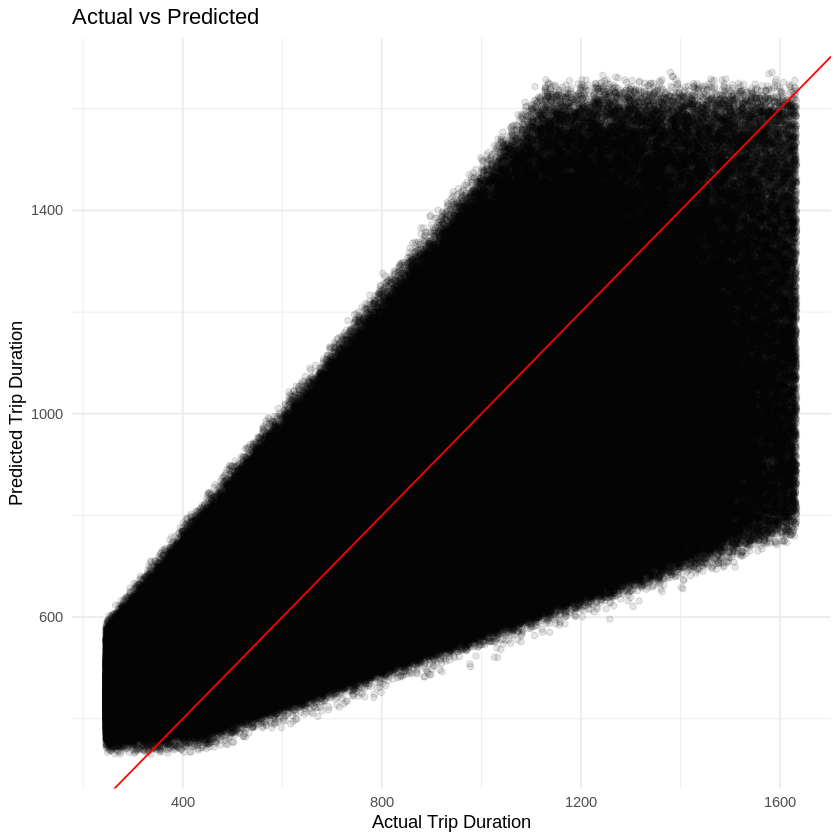

In [ ]:
# График фактических значений против прогнозируемых
ggplot(residuals, aes(x = Actual, y = Predicted)) +
  geom_point(alpha=0.1) +
  geom_abline(intercept = 0, slope = 1, color="red") +
  labs(title = "Actual vs Predicted",
       x = "Actual Trip Duration",
       y = "Predicted Trip Duration") +
  theme_minimal()

В целом, модель линейной регрессии с применением методики Elastic Net демонстрирует хорошие результаты на основе проведенного анализа. Оценка качества модели с использованием различных метрик, таких как среднеквадратическая ошибка (RMSE), коэффициент детерминации (R2) и средняя абсолютная ошибка (MAE), указывает на ее способность к точному прогнозированию продолжительности поездок в такси. Эти результаты говорят о том, что модель может быть успешно применена для прогнозирования поездок в такси и использована в реальных условиях для оптимизации бизнес-процессов и улучшения качества обслуживания клиентов.